# Import libraries

In [12]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import time
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import random_projection
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict, Counter
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score, homogeneity_score, silhouette_score,adjusted_rand_score,completeness_score,v_measure_score,fowlkes_mallows_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import sys
import warnings
from sklearn.decomposition import FastICA
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer,InterclusterDistance
from sklearn.datasets import make_blobs
from scipy.stats import norm, kurtosis
#from silhouette import silhouette
from itertools import product
from sklearn.random_projection import SparseRandomProjection as RCA
import scipy.sparse as sps
from scipy.linalg import pinv
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.random_projection import GaussianRandomProjection
import seaborn as sns
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
#matplotlib.rc('figure', figsize=[10,5])

# Read dataset

In [2]:
phishing = pd.read_csv('Phishing.csv')
print(phishing.dtypes)
print(f'unique Value of our Target_class:  {phishing.Result.unique()}')

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

# Scaling

In [3]:
#phishing.head()

In [4]:
#phishing.columns

In [5]:
#predictors_list = ['having_IP_Address', 'URL_Length', 'Shortining_Service',
#       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
#       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
#       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
#       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
#       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
#       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
#       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']

#target = phishing['Result']
#result_X = phishing[predictors_list]
#print(result_X.shape)
#min_max_scaler = preprocessing.MinMaxScaler()
#result_X_scaled = min_max_scaler.fit_transform(result_X)

#print(result_X_scaled.shape)
#phishing_scaled = pd.DataFrame(result_X_scaled, columns=predictors_list)
#phishing_scaled['Result'] = target
#phishing_scaled.head()

# Split into x and y

In [6]:
#X = phishing_scaled.drop('Result', axis=1).copy().values
#y = phishing_scaled['Result'].copy().values

In [7]:
X = phishing.drop('Result', axis=1)
y = phishing['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [8]:
LABELS = ['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']

In [9]:
X_train.shape

(1964, 30)

In [10]:
clust_range = list(range(2,31,1))

# K-means

## Elbow

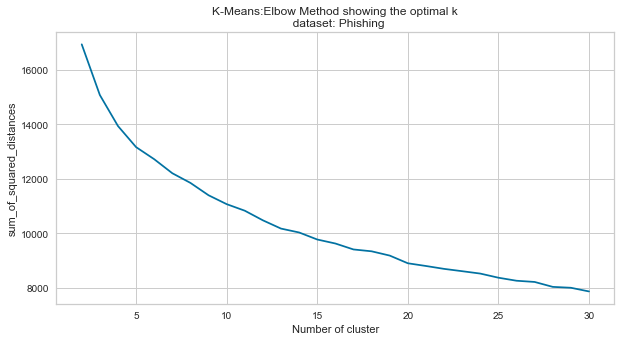

In [54]:
sse = {}
for cluster_size in clust_range:
    kmeans = KMeans(n_clusters=cluster_size, max_iter=10000, random_state=7).fit(X_train)
    sse [cluster_size] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel('sum_of_squared_distances')
plt.title('K-Means:Elbow Method showing the optimal k\n  dataset: Phishing')
plt.show()

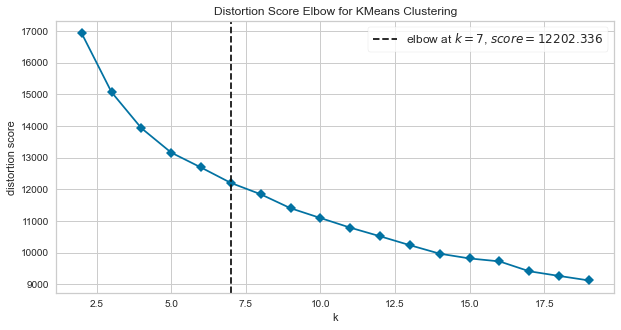

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings=False)
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [21]:
kmeans = KMeans(n_clusters=7, max_iter=10000, random_state=7).fit(X_train)
print(f'adjusted_mutual_info_score based on 7 clusters :{adjusted_mutual_info_score((kmeans.labels_), y_train)}')
print(f'adjusted rand index based on 7 clusters :{adjusted_rand_score((kmeans.labels_), y_train)}')
print(f'homogeneity_score based on 7 clusters :{homogeneity_score((kmeans.labels_), y_train)}')
print(f'completeness_score based on 7 clusters :{completeness_score((kmeans.labels_), y_train)}')
print(f'v_measure_score based on 7 clusters :{v_measure_score((kmeans.labels_), y_train)}')
print(f'fowlkes_mallows_score based on 7 clusters :{fowlkes_mallows_score((kmeans.labels_), y_train)}')


adjusted_mutual_info_score based on 7 clusters :0.2791335481620399
adjusted rand index based on 7 clusters :0.18313444401872142
homogeneity_score based on 7 clusters :0.19033421574513812
completeness_score based on 7 clusters :0.5292763998727326
v_measure_score based on 7 clusters :0.2799831083528138
fowlkes_mallows_score based on 7 clusters :0.44348829767068715


In [20]:
kmeans = KMeans(n_clusters=7, max_iter=10000, random_state=7).fit(X_train)
print(f'adjusted_mutual_info_score based on 7 clusters :{adjusted_mutual_info_score((1-kmeans.labels_), y_train)}')
print(f'adjusted rand index based on 7 clusters :{adjusted_rand_score((1-kmeans.labels_), y_train)}')
print(f'homogeneity_score based on 7 clusters :{homogeneity_score((1-kmeans.labels_), y_train)}')
print(f'completeness_score based on 7 clusters :{completeness_score((1-kmeans.labels_), y_train)}')
print(f'v_measure_score based on 7 clusters :{v_measure_score((1-kmeans.labels_), y_train)}')
print(f'fowlkes_mallows_score based on 7 clusters :{fowlkes_mallows_score((1-kmeans.labels_), y_train)}')


adjusted_mutual_info_score based on 7 clusters :0.2791335481620399
adjusted rand index based on 7 clusters :0.18313444401872142
homogeneity_score based on 7 clusters :0.19033421574513812
completeness_score based on 7 clusters :0.5292763998727326
v_measure_score based on 7 clusters :0.2799831083528138
fowlkes_mallows_score based on 7 clusters :0.44348829767068715


#### with scaling, accuracy score is dramatically higher, around 0.32
#### but adjusted score is significantly lower, around 0.16

## Metrics

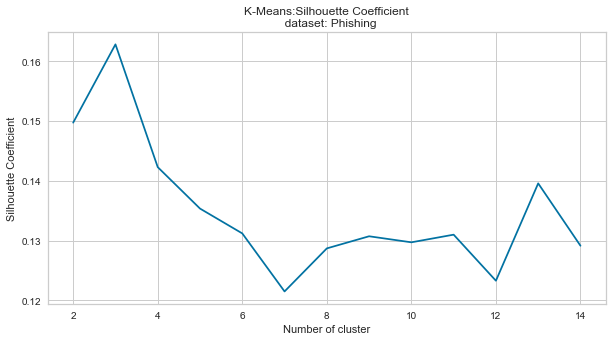

In [52]:
silh = {}
homog = {}
for cluster_size in range(2,15):
    kmeans = KMeans(n_clusters=cluster_size, max_iter=10000, random_state=7).fit(X_train)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, label)
    silh[cluster_size] = sil_coeff
    homog[cluster_size] = homog_score
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()),'bx-' )
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.title('K-Means:Silhouette Coefficient\n  dataset: Phishing')
plt.show()

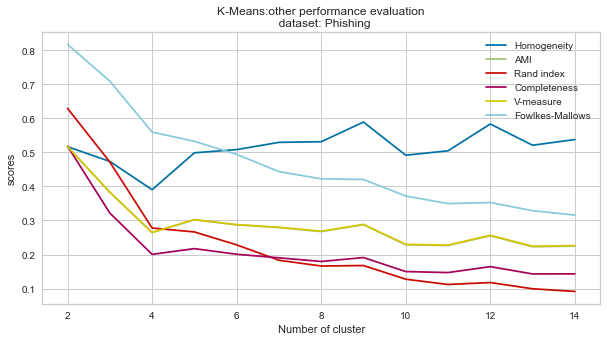

In [55]:
homog = {}
mutual = {}
rand = {}
comple = {}
vmeasure = {}
fowlkes = {}

for cluster_size in range(2,15):
    kmeans = KMeans(n_clusters=cluster_size, max_iter=10000, random_state=7).fit(X_train)
    label = kmeans.labels_
    #sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, label)
    mutual_score = adjusted_mutual_info_score(y_train, label)
    rand_score = adjusted_rand_score(y_train, label)
    comple_score = completeness_score(y_train, label)
    vmeasure_score = v_measure_score(y_train, label)
    fowlkes_score = fowlkes_mallows_score(y_train, label)
    
    #silh[cluster_size] = sil_coeff
    homog[cluster_size] = homog_score
    mutual[cluster_size] = mutual_score
    rand[cluster_size] = rand_score
    comple[cluster_size] = comple_score
    vmeasure[cluster_size] = vmeasure_score
    fowlkes[cluster_size] = fowlkes_score
    
    
plt.figure()
plt.plot(list(homog.keys()), list(homog.values()), label="Homogeneity")
plt.plot(list(mutual.keys()), list(mutual.values()), label="AMI")
plt.plot(list(rand.keys()), list(rand.values()), label="Rand index")
plt.plot(list(comple.keys()), list(comple.values()), label="Completeness")
plt.plot(list(vmeasure.keys()), list(vmeasure.values()), label="V-measure")
plt.plot(list(fowlkes.keys()), list(fowlkes.values()), label="Fowlkes-Mallows")

plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("scores")
plt.title('K-Means:other performance evaluation\n  dataset: Phishing')
plt.show()

In [7]:
def get_kmean_scores(X, y, N):


    def get_kmean(n):
        km = KMeans(n_clusters=n,random_state=7, max_iter=10000)
        km.fit(X)
        km_labels = km.predict(X)
        
        hom = homogeneity_score(y, km_labels)
        ami = adjusted_mutual_info_score(y,km_labels)
        rand = adjusted_rand_score(y,km_labels)
        comple = completeness_score(y,km_labels)
        vmeasure = v_measure_score(y,km_labels)
        fowm = fowlkes_mallows_score(y, km_labels)
        
        
        return hom, ami, rand, comple, vmeasure, fowm 
    
  
    
    n_rng = np.arange(2,N+1)
    scores_df = pd.DataFrame()

    for n in n_rng:
        results = {'n':n}
        hom, ami, rand, comple, vmeasure, fowm  = get_kmean(n)            
        results[f"hom"] = hom; results[f"ami"] = ami; results[ f"rand"] = rand; results[f"comple"] = comple; results[f"vmeasure"] = vmeasure; results[f"fowm"] = fowm 
        print(f" done with N: {n}")
        
        scores_df = scores_df.append(results, ignore_index=True)
            

    return scores_df

In [8]:
def plot_elbow_kmeans(k_metric_df, name='dsname'):
    
    #fig = plt.figure(figsize=[2,3])

    plt.figure()
    
    x_vals = k_metric_df['n'].values
    x_vals = x_vals.astype('int32')
    
    plt.plot(x_vals, k_metric_df['hom'], label="Homogeneity")
    plt.plot(x_vals, k_metric_df['ami'], label="AMI")
    plt.plot(x_vals, k_metric_df['rand'], label="Rand index")
    plt.plot(x_vals, k_metric_df['comple'], label="Completeness")
    plt.plot(x_vals, k_metric_df['vmeasure'], label="V-measure")
    plt.plot(x_vals, k_metric_df['fowm'], label="Fowlkes-Mallows")

    plt.legend()
    plt.xlabel("Number of cluster")
    plt.ylabel("scores")
    plt.title('K-Means:other performance evaluation\n dataset: %s '%name)
    plt.show()

In [8]:
scores_df = get_kmean_scores(X_train, y_train, 16)

 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
 done with N: 11
 done with N: 12
 done with N: 13
 done with N: 14
 done with N: 15
 done with N: 16


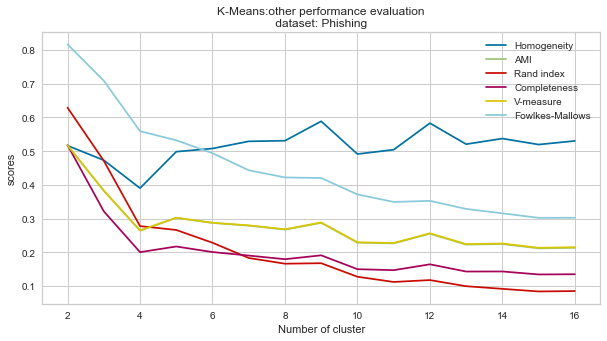

In [9]:
plot_elbow_kmeans(scores_df, 'Phishing')

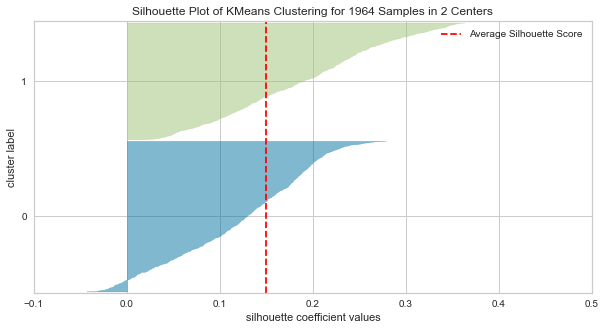

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1964 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [73]:
#2
model = KMeans(2, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

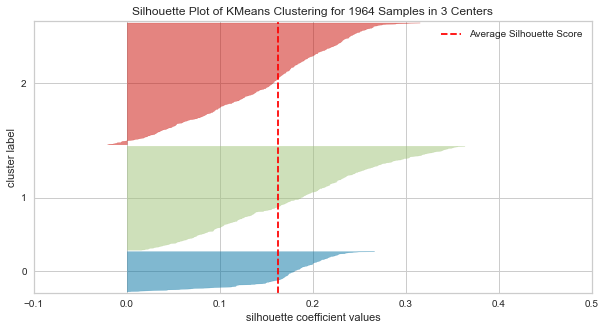

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1964 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [74]:
#3
model = KMeans(3, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()        

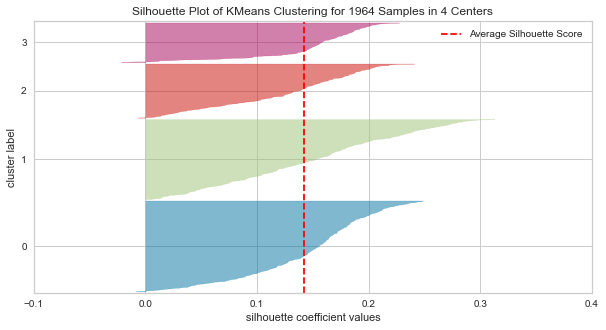

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1964 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
#4
model = KMeans(4, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

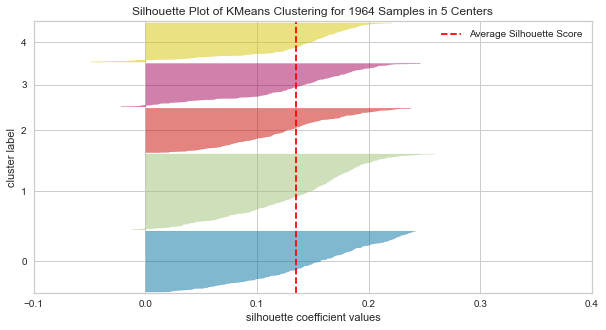

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1964 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
#5
model = KMeans(5, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

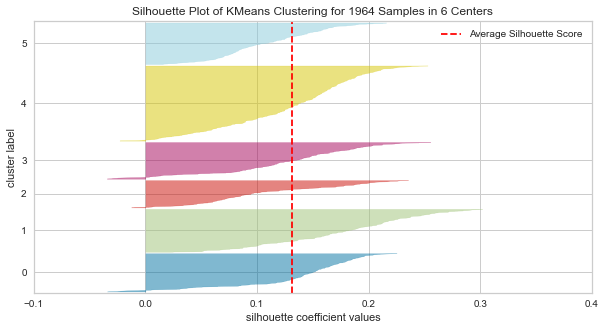

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1964 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:
#6
model = KMeans(6, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

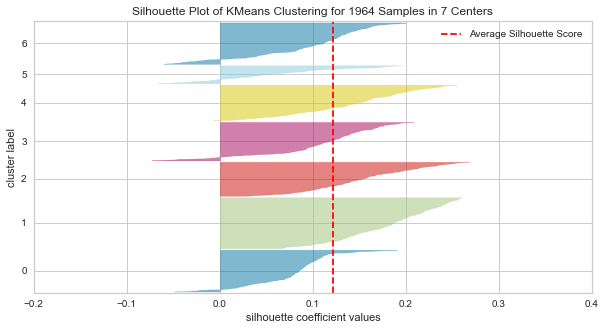

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1964 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
#7
model = KMeans(7, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

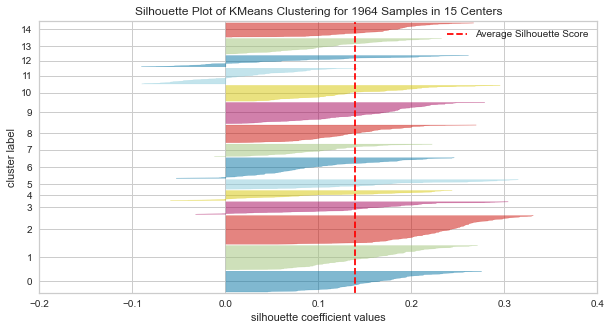

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1964 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
#15
model = KMeans(15, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

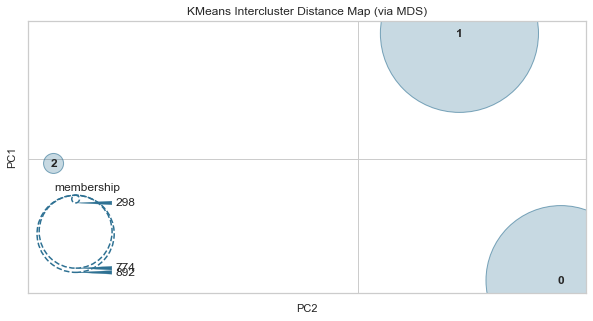

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [80]:
model = KMeans(3)
visualizer = InterclusterDistance(model, random_state=7)
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()   

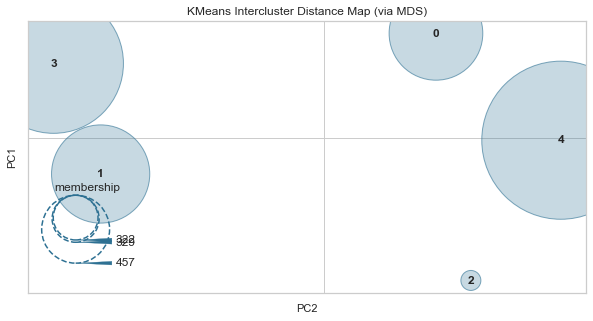

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [81]:
model = KMeans(5)
visualizer = InterclusterDistance(model, random_state=7)
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()   

In [47]:
kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=7).fit(X_train)
print(f'adjusted_mutual_info_score based on 3 clusters :{adjusted_mutual_info_score((kmeans.labels_), y_train)}')
print(f'adjusted rand index based on 3 clusters :{adjusted_rand_score((kmeans.labels_), y_train)}')
print(f'homogeneity_score based on 3 clusters :{homogeneity_score((kmeans.labels_), y_train)}')
print(f'completeness_score based on 3 clusters :{completeness_score((kmeans.labels_), y_train)}')
print(f'v_measure_score based on 3 clusters :{v_measure_score((kmeans.labels_), y_train)}')
print(f'fowlkes_mallows_score based on 3 clusters :{fowlkes_mallows_score((kmeans.labels_), y_train)}')

adjusted_mutual_info_score based on 3 clusters :0.382664825166037
adjusted rand index based on 3 clusters :0.4715131036632568
homogeneity_score based on 3 clusters :0.3216953200875924
completeness_score based on 3 clusters :0.47327943112185805
v_measure_score based on 3 clusters :0.38303550610629716
fowlkes_mallows_score based on 3 clusters :0.7090337479461949


In [ ]:
'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'

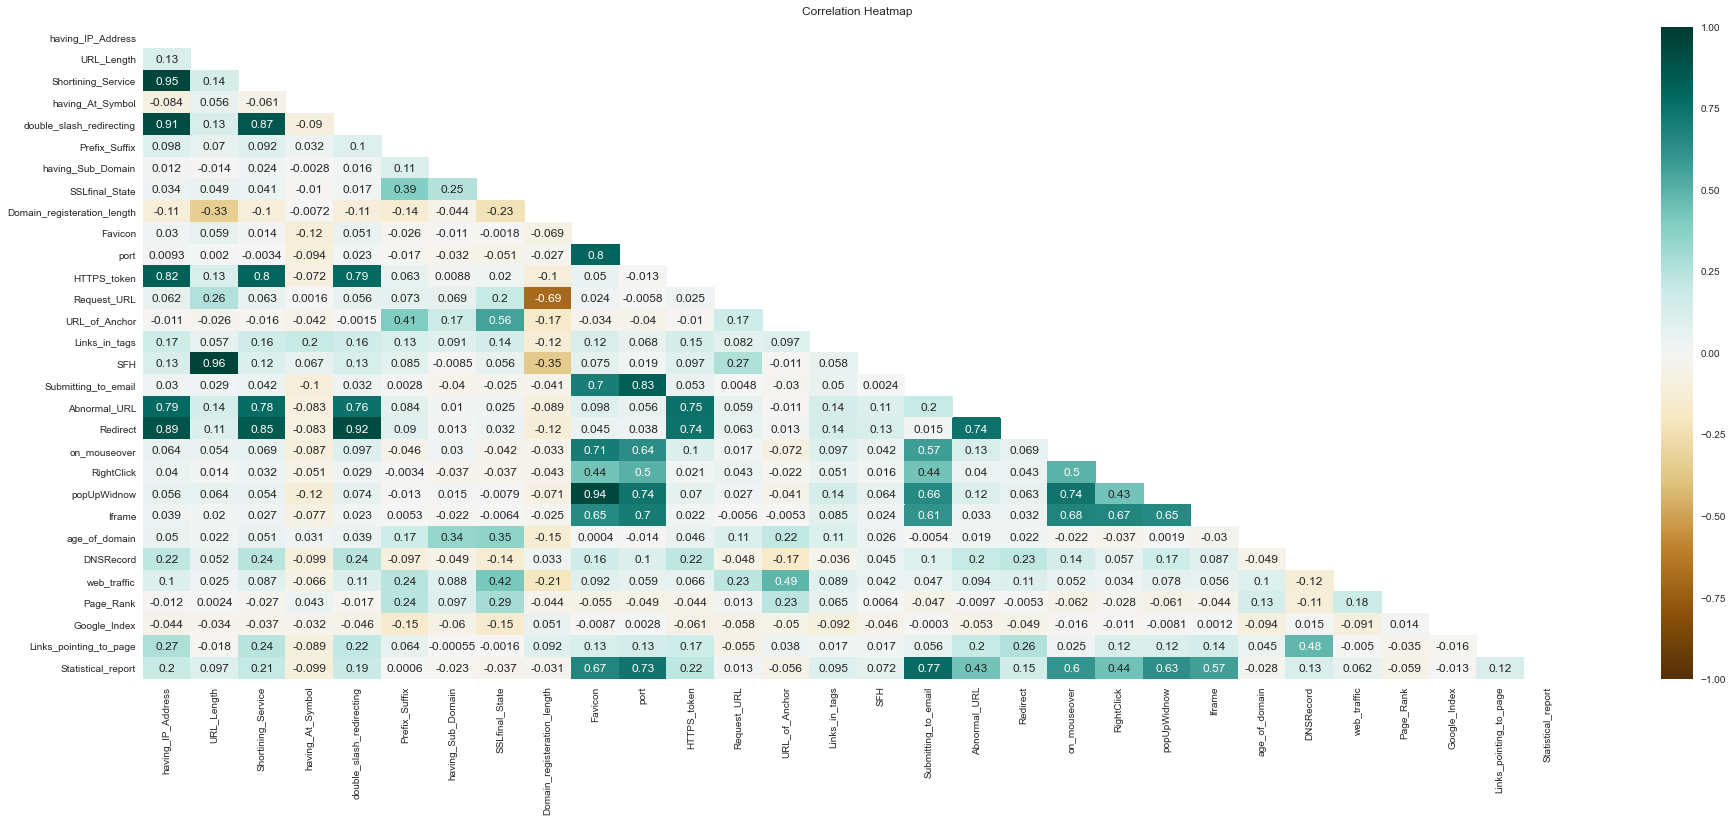

In [58]:
##Point Biserial Correlation
from scipy import stats
num_corr=X_train.corr()
plt.figure(figsize=(32, 12))
mask = np.triu(np.ones_like(num_corr, dtype=np.bool))
num_heatmap = sns.heatmap(num_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
num_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

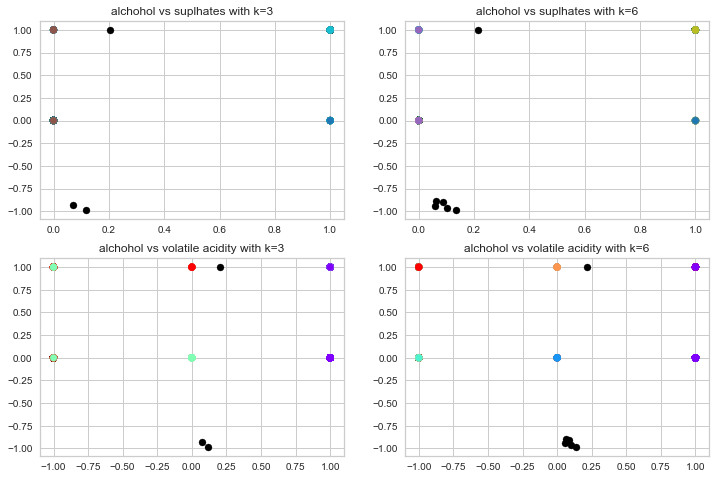

In [55]:
fig=plt.gcf() 
fig.set_size_inches(12,8) 
count = 1

for optimal_k in [3, 6]:
  kmeans = KMeans(init='k-means++', n_clusters=optimal_k, random_state=7).fit(X_train)
  plt.subplot(2, 2, count)  
  plt.title("alchohol vs suplhates with k=" + str(optimal_k))
  plt.scatter(X_train['popUpWidnow'], X_train['Favicon'], c=kmeans.labels_, cmap='tab10')    
  plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
 
  plt.subplot(2, 2, count+2)
  plt.title("alchohol vs volatile acidity with k=" + str(optimal_k))
  plt.scatter(X_train['URL_Length'], X_train['Shortining_Service'], c=kmeans.labels_, cmap='rainbow')    
  plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
 
  count += 1

plt.show()

Text(0.5, 1.08, 'Kmeans: pairwise plotting, k-cluster = 3\n dataset: Phishing')

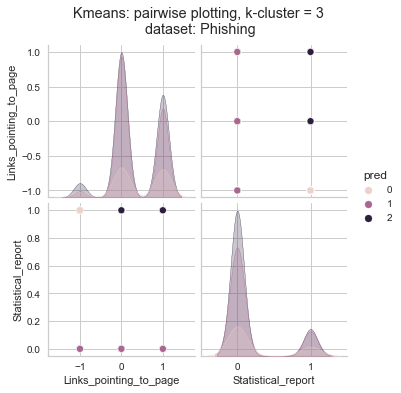

In [43]:
#Kmeans Pairwise
pair_df = pd.DataFrame(X_train)

km = KMeans(n_clusters=3,random_state=7, max_iter=10000)
km.fit(X_train)
labels = km.labels_
pred_clusters = km.predict(X_train)
pred_clusters.shape

filtred_df = pair_df.filter(['Links_pointing_to_page', 'Statistical_report'], axis=1)

filtred_df['pred'] = labels #pred_mal_clusters
ax = sns.pairplot(filtred_df, hue="pred")
ax.fig.suptitle("Kmeans: pairwise plotting, k-cluster = 3\n dataset: Phishing", y=1.08)

Text(0.5, 1.08, 'Ground truth labels: pairwise plotting, k-cluster = 2\n dataset: Phishing')

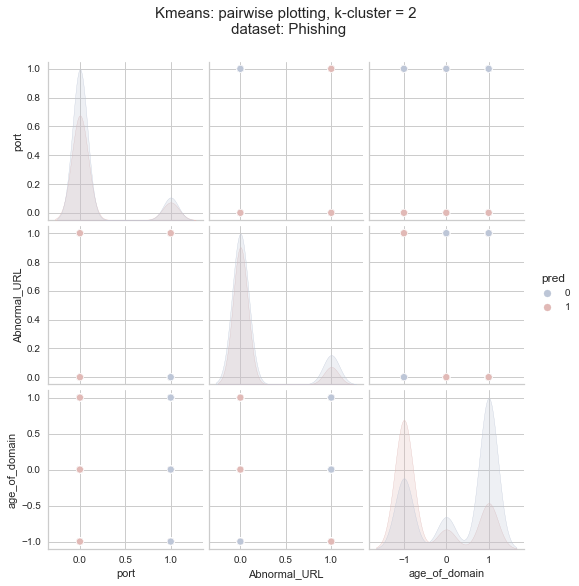

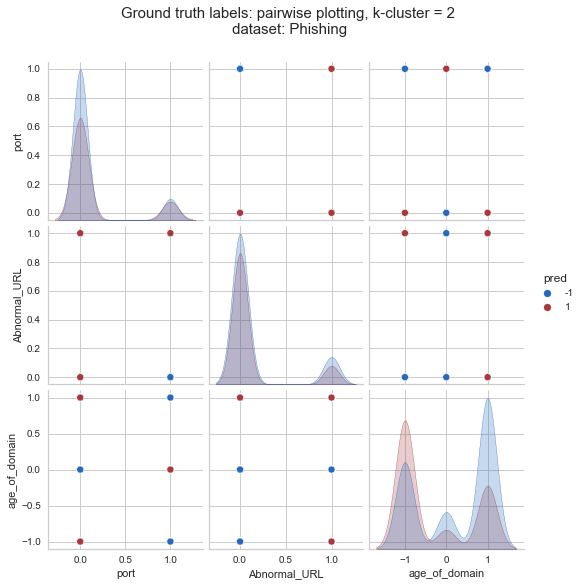

In [74]:
pair_df = pd.DataFrame(X_train)
#Kmeans Pairwise
km = KMeans(n_clusters=2,random_state=7, max_iter=10000 )
km.fit(X_train)
labels = km.labels_
pred_clusters = km.predict(X_train)
pred_clusters.shape

filtred_df = pair_df.filter(['port', 'Abnormal_URL','age_of_domain'], axis=1)


'''
Comparing if the k-means clustering is natually lining up or not with the actual ground truth, just use K=2 
and do pairwise with a few important columns
'''

#USE K=2 k-mean prediction
filtred_df['pred'] = pred_clusters
ax = sns.pairplot(filtred_df, hue="pred", palette = 'vlag')
ax.fig.suptitle("Kmeans: pairwise plotting, k-cluster = 2\n dataset: Phishing", y=1.08, fontsize=15)

#USING ground truth y-values
filtred_df['pred'] = y_train 
ax = sns.pairplot(filtred_df, hue="pred", palette = 'vlag')
ax.fig.suptitle("Ground truth labels: pairwise plotting, k-cluster = 2\n dataset: Phishing", y=1.08, fontsize=15)


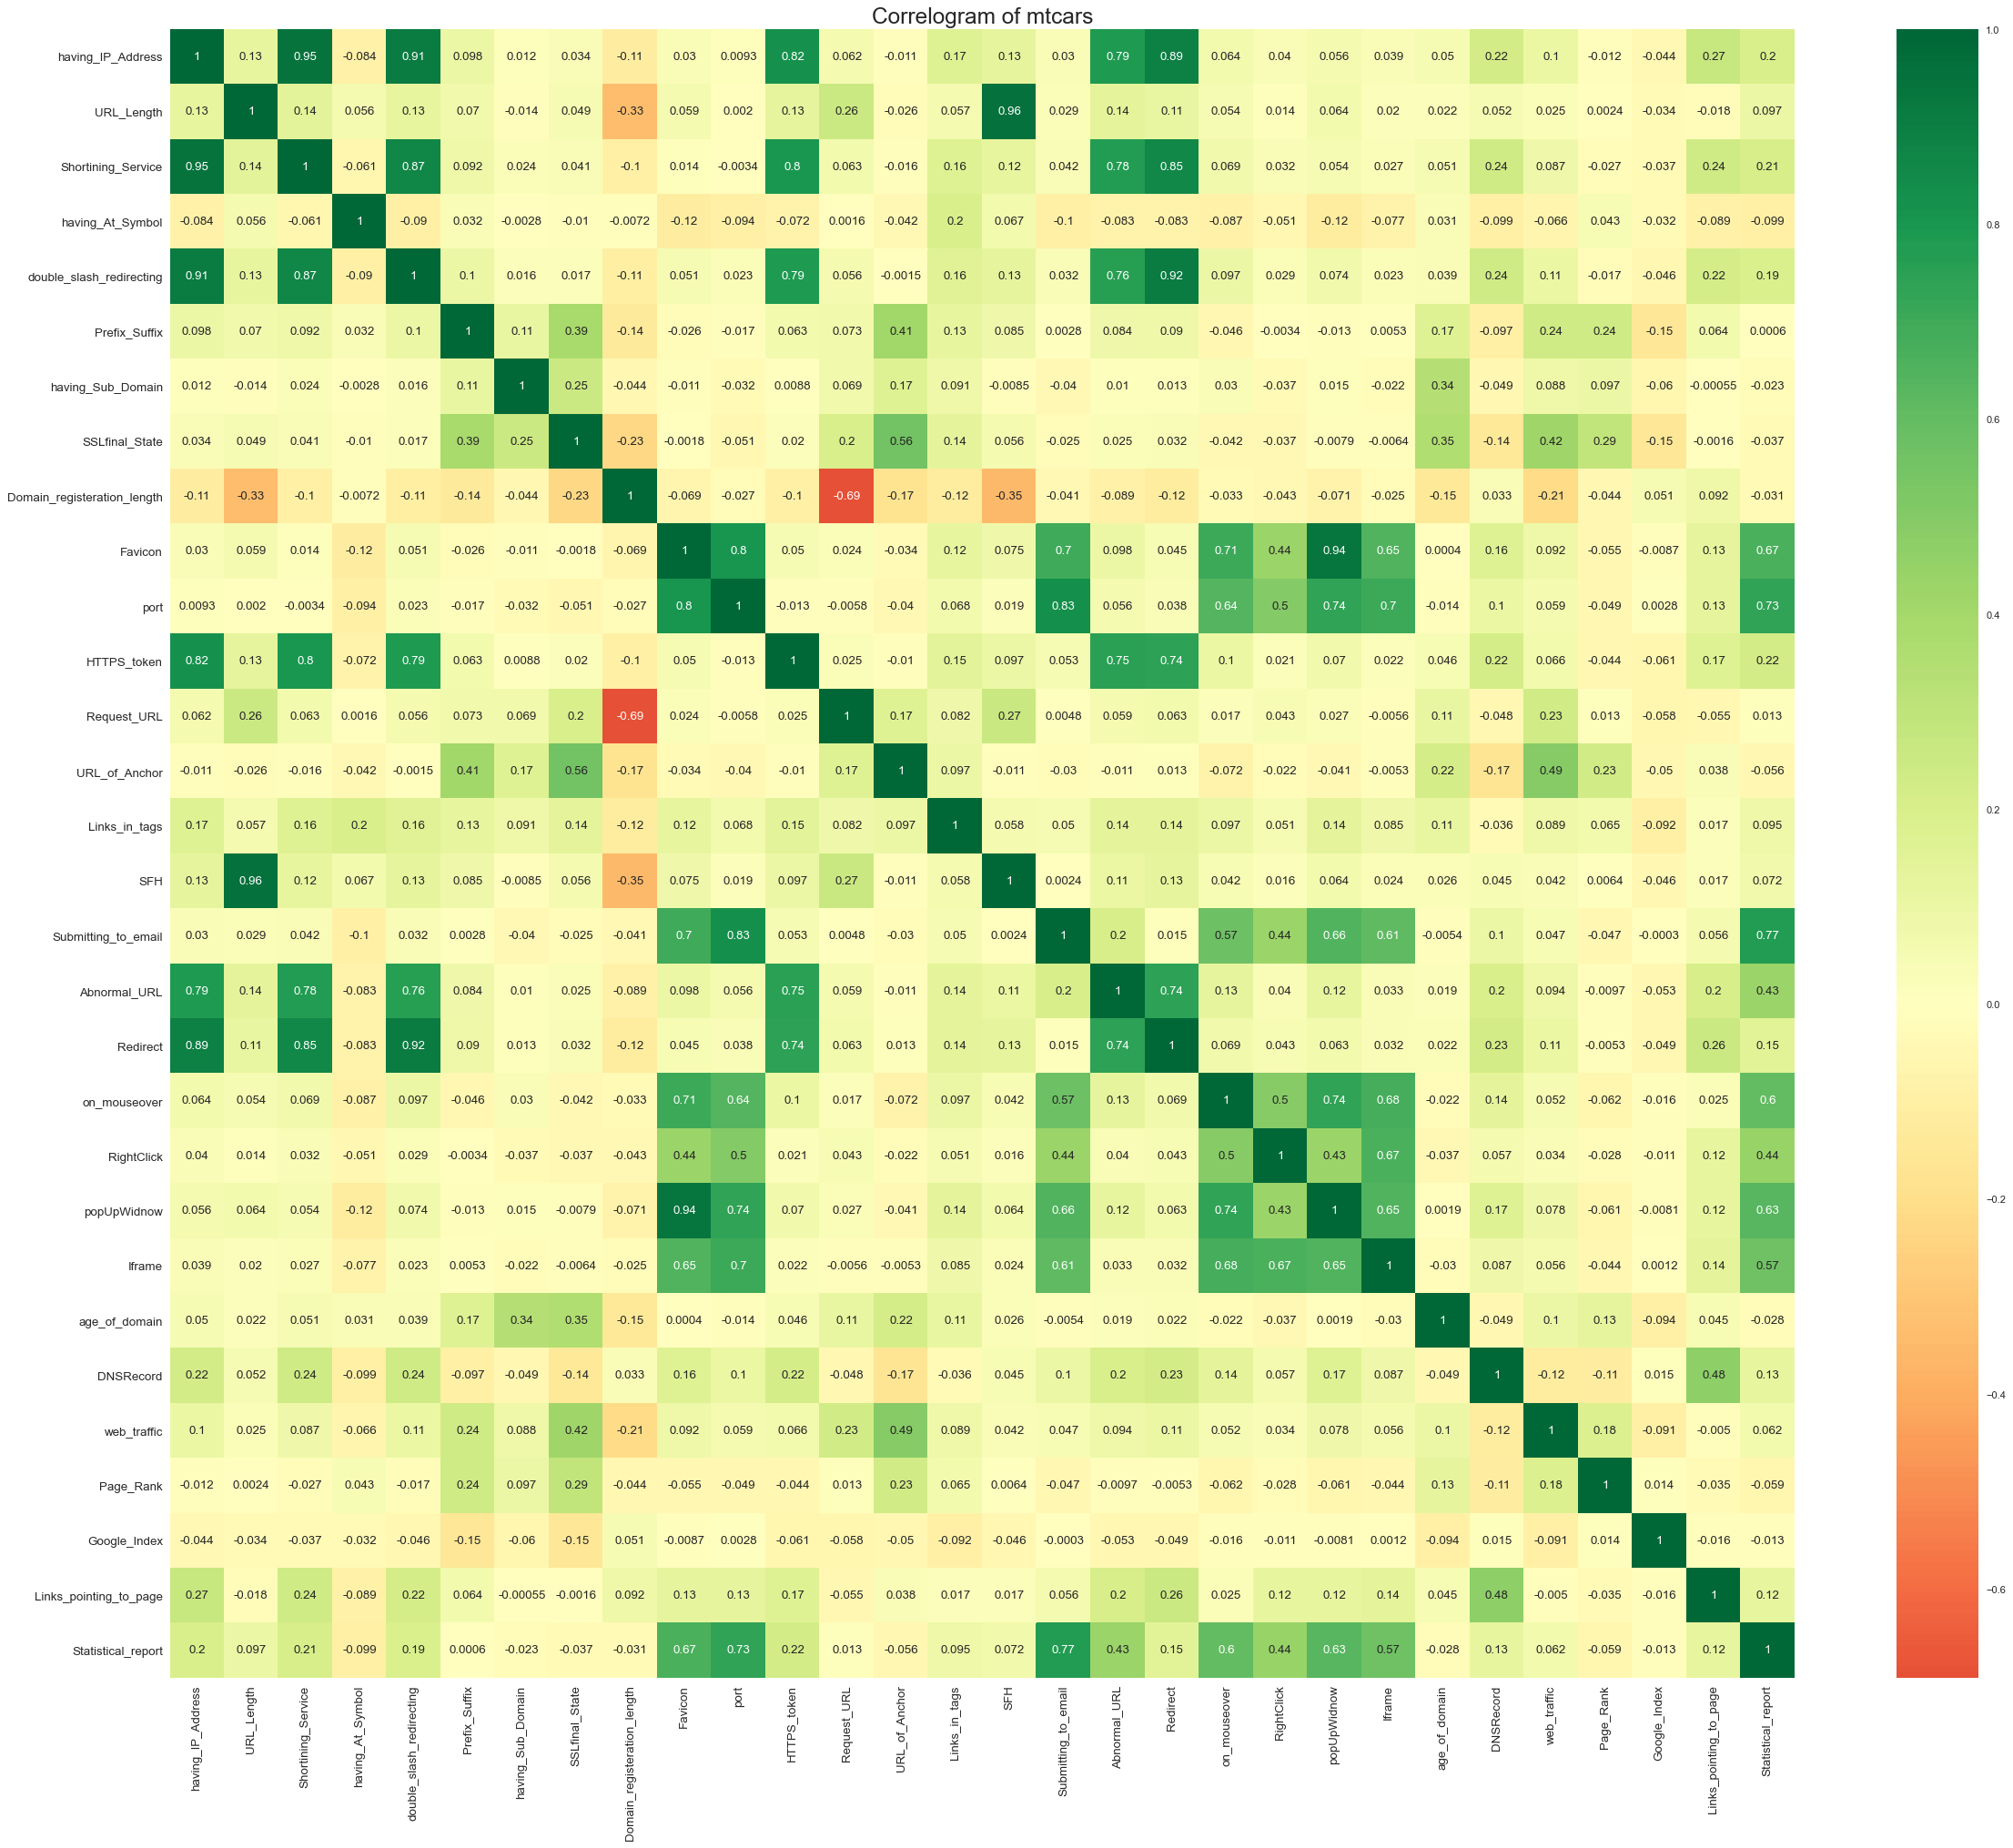

In [57]:
plt.figure(figsize=(36,30), dpi= 80)
sns.heatmap(X_train.corr(), xticklabels=X_train.corr().columns, yticklabels=X_train.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
(X_train, columns='having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',)

In [59]:
data_demographic=pd.concat([X_train['having_IP_Address'],X_train['URL_Length'],
                            X_train['Shortining_Service'],X_train['double_slash_redirecting'],
                            X_train['Favicon'],X_train['port']],axis=1)

In [ ]:
data_frequency=pd.concat([X_train['having_IP_Address'],X_train['URL_Length'],
                            X_train['Shortining_Service'],X_train['double_slash_redirecting'],
                            X_train['Favicon'],X_train['port']],axis=1)
fig,ax=plt.subplots(ncols=4,figsize=(20,5))
sns.scatterplot(data=data_frequency,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=data_frequency,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=data_frequency,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
_scat=sns.scatterplot(data=data_frequency,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

# EM

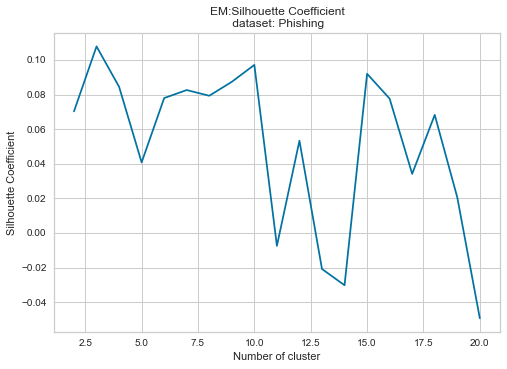

In [13]:
# Churn dataset on EM
silh_em = {}
homog_em = {}
ll_em = {}
for cluster in range(2,21):
    gmm = GaussianMixture(n_components=cluster, max_iter=10000, random_state=7, 
                          n_init=5).fit(X_train)
    label = gmm.predict(X_train)
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, label)
    silh_em[cluster] = sil_coeff
    homog_em[cluster] = homog_score
    ll_em[cluster] = gmm.score(X_test)
plt.figure()
plt.plot(list(silh_em.keys()), list(silh_em.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.title("EM:Silhouette Coefficient\n dataset: Phishing")
plt.show()

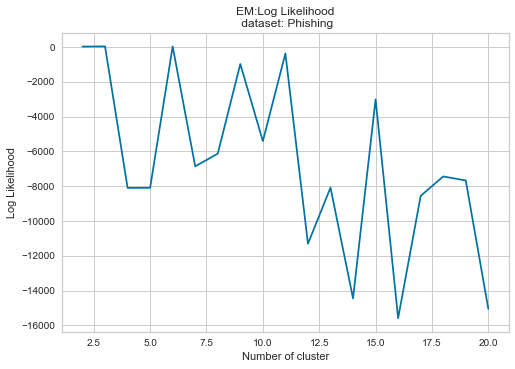

In [14]:
plt.figure()
plt.plot(list(ll_em.keys()), list(ll_em.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Log Likelihood")
plt.title("EM:Log Likelihood\n dataset: Phishing")
plt.show()

In [50]:
def get_em_results_names():
    cv_types = ["spherical", "tied", "diag", "full"]
    score_types = ["sil","bic","hom", "fowm", "ami"]
    names = [f"{sc}_{cv}" for sc in score_types for cv in cv_types] 
    return names



def get_em_scores(X, y, N):


    def get_em(n, cv_t):
        gmm = GMM(n_components=n, covariance_type=cv_t, warm_start=True, random_state=7)
        gmm.fit(X)
        gmm_labels = gmm.predict(X)

        ss = silhouette_score(X, gmm_labels, metric='euclidean')
        bic = gmm.bic(X)
        hom = homogeneity_score(y, gmm_labels)
        fowm = fowlkes_mallows_score(y, gmm_labels)
        ami = adjusted_mutual_info_score(y,gmm_labels)
        return ss, bic, hom, fowm, ami
    
    cv_types = ["spherical", "tied", "diag", "full"]
        
    
    n_rng = np.arange(2,N+1)
    
    names =['n'] + get_em_results_names()

    scores_df = pd.DataFrame(columns=names)

    for n in n_rng:
        results = {'n':n}
        for cv_t in cv_types:
            ss_em, bic, hom, fowm, ami = get_em(n,cv_t)            
            results[ f"sil_{cv_t}"] =  ss_em; results[f"bic_{cv_t}"] = bic ; results[f"hom_{cv_t}"] = hom; results[f"fowm_{cv_t}"] = fowm; results[f"ami_{cv_t}"] = ami
        print(f" done with N: {n}")
        
        scores_df = scores_df.append(results, ignore_index=True)
            

    return scores_df

In [11]:
def plot_elbow_em(k_metric_df, name='dsname', face_color=None):
    
    figsave=False
    
    
    fig = plt.figure(figsize=[20,5])
    ax1 = fig.add_subplot(151)
    ax2 = fig.add_subplot(152)
    ax3 = fig.add_subplot(153)
    ax4 = fig.add_subplot(154)
    ax5 = fig.add_subplot(155)
    allAxs = [ax1, ax2, ax3, ax4, ax5] 

    
    x_vals = k_metric_df['n'].values
    x_vals = x_vals.astype('int32')

    for cv_t in ["spherical", "tied", "diag", "full"]:
        
        ax1.plot(x_vals, k_metric_df['sil_'+cv_t], label=f"{cv_t}")
        ax2.plot(x_vals, k_metric_df['bic_'+cv_t], label=f"{cv_t}")
        ax3.plot(x_vals, k_metric_df['hom_'+cv_t], label=f"{cv_t}")
        ax4.plot(x_vals, k_metric_df['fowm_'+cv_t], label=f"{cv_t}")
        ax5.plot(x_vals, k_metric_df['ami_'+cv_t], label=f"{cv_t}")
   
    ax1.set_xticks(x_vals); ax2.set_xticks(x_vals); ax3.set_xticks(x_vals); ax4.set_xticks(x_vals);ax5.set_xticks(x_vals)
    
    if face_color != None:
        for ax in allAxs:
            ax.set_facecolor(face_color)

    ax1.legend(); ax1.set_ylabel("Silhouette Score"); ax1.set_xlabel("Number of cluster");ax1.grid(True)
    ax2.legend(); ax2.set_ylabel("Bic Score"); ax2.set_xlabel("Number of cluster");ax2.grid(True)
    ax3.legend(); ax3.set_ylabel("Homogeneity Score"); ax3.set_xlabel("Number of cluster"); ax3.grid(True)
    ax4.legend(); ax4.set_ylabel("Fowlkes-Mallows Score"); ax4.set_xlabel("Number of cluster"); ax4.grid(True)
    ax5.legend(); ax5.set_ylabel("AMI Score"); ax5.set_xlabel("Number of cluster"); ax5.grid(True)

    ax1.set_title('EM: Elbow silhouette score\n  dataset: %s '%name)
    ax2.set_title('EM: BIC score\n  dataset: %s '%name)
    ax3.set_title('EM: Homogeneity score\n  dataset: %s '%name)
    ax4.set_title('EM: Fowlkes-Mallows score\n  dataset: %s '%name)
    ax5.set_title('EM: Ajusted Mutual Information score\n  dataset: %s '%name)



    fig.tight_layout()
    plt.show()

    #if figsave:
    #    fig.savefig('plots/em_cov_%s_results.png'%short_name, bbox_inches='tight')
    #    plt.close(fig=fig)
    #else:
    #    plt.show()

In [30]:
scores_x = get_em_scores(X_train, y_train, 10)

 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10


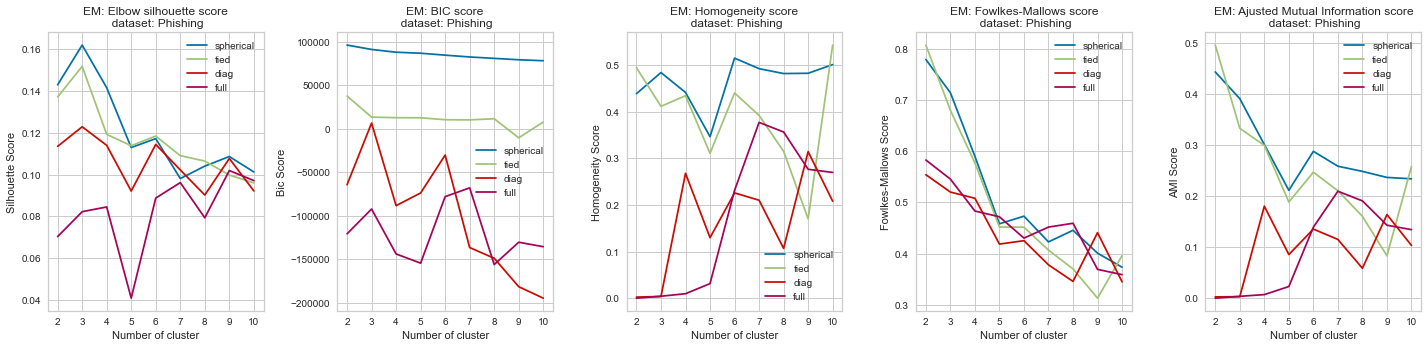

In [40]:
plot_elbow_em(scores_x, 'Phishing')

Text(0.5, 1.08, 'Ground truth labels: pairwise plotting, k-cluster = 2\n dataset: Phishing')

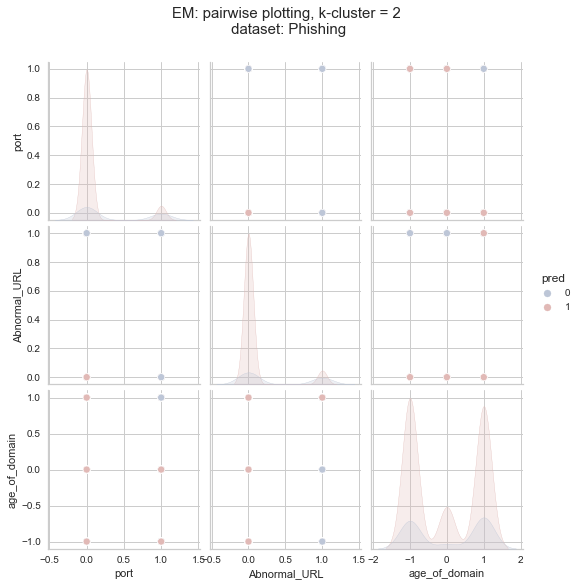

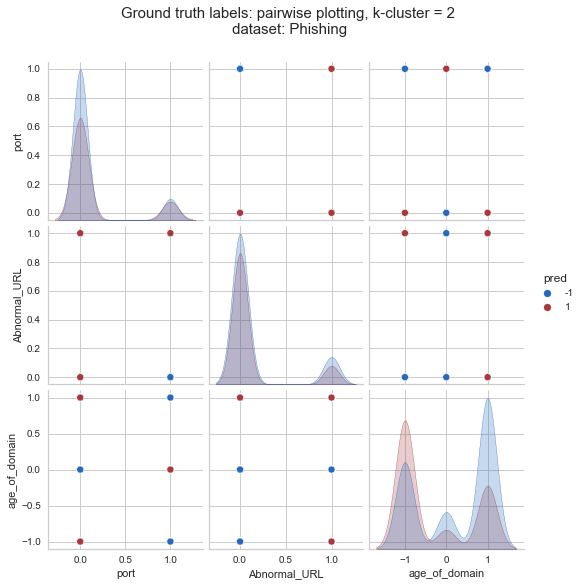

In [75]:
pair_df = pd.DataFrame(X_train)
#EM Pairwise
gmm = GMM(n_components=2, covariance_type='full', random_state=7)
gmm.fit(X_train)
pred_clusters = gmm.predict(X_train)

filtred_df = pair_df.filter(['port', 'Abnormal_URL','age_of_domain'], axis=1)


'''
Comparing if the em clustering is natually lining up or not with the actual ground truth, just use K=2 
and do pairwise with a few important columns
'''

#USE K=2 em prediction
filtred_df['pred'] = pred_clusters
ax = sns.pairplot(filtred_df, hue="pred", palette = 'vlag' )
ax.fig.suptitle("EM: pairwise plotting, k-cluster = 2\n dataset: Phishing", y=1.08, fontsize=15)

#USING ground truth y-values
filtred_df['pred'] = y_train 
ax = sns.pairplot(filtred_df, hue="pred", palette = 'vlag' )
ax.fig.suptitle("Ground truth labels: pairwise plotting, k-cluster = 2\n dataset: Phishing", y=1.08, fontsize=15)

# Feature Reduction

## PCA

In [12]:
pca = PCA(random_state=7)
pca.fit(X_train)
pca_ind = pca.explained_variance_ratio_
print(pca_ind)

[0.20935265 0.1360305  0.08521409 0.08126551 0.07479621 0.05679252
 0.05157125 0.04775849 0.04535601 0.03951919 0.03195552 0.03186655
 0.02226858 0.02177783 0.01329533 0.01113018 0.00870735 0.00580059
 0.00470127 0.00444115 0.00323406 0.0026843  0.00240029 0.0019529
 0.00167108 0.00146305 0.00115252 0.00076932 0.00069305 0.00037866]


In [16]:
pca_cumsum = pca.explained_variance_ratio_.cumsum()
print(pca_cumsum)

[0.20935265 0.34538316 0.43059725 0.51186276 0.58665897 0.64345149
 0.69502273 0.74278123 0.78813724 0.82765643 0.85961195 0.89147851
 0.91374709 0.93552491 0.94882025 0.95995042 0.96865777 0.97445835
 0.97915963 0.98360078 0.98683484 0.98951914 0.99191943 0.99387233
 0.99554341 0.99700646 0.99815898 0.9989283  0.99962134 1.        ]


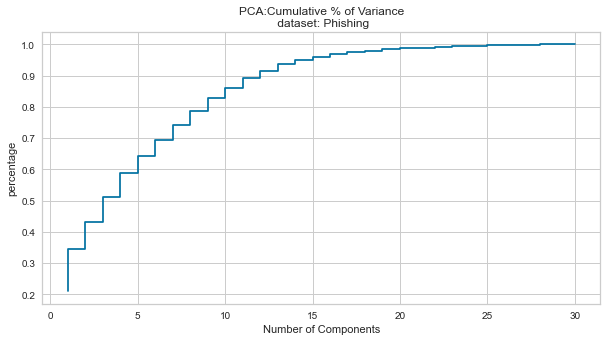

In [21]:
plt.figure()
plt.step(range(1, 31),pca_cumsum)
plt.xlabel("Number of Components")
plt.ylabel("percentage")
plt.title("PCA:Cumulative % of Variance\n dataset: Phishing")
plt.show()

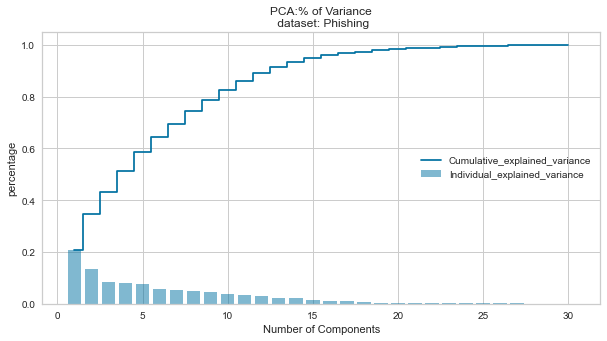

In [157]:
plt.bar(range(1, 31), pca_ind, alpha=0.5, align='center', label='Individual_explained_variance')  
plt.step(range(1, 31), pca_cumsum, where='mid', label='Cumulative_explained_variance') 
plt.ylabel("percentage")
plt.xlabel("Number of Components")
plt.title("PCA:% of Variance\n dataset: Phishing")
plt.legend(loc='right')
plt.show()

In [24]:
pca.explained_variance_ratio_[:12
                             ].sum()

0.8914785053647161

In [32]:
pca = PCA(n_components=13,random_state=7)
pca.fit(X_train)
pca_X =pca.transform(X_train)

In [33]:
import seaborn as sns

def plot_pca(vector_num,top_comp):
    v_1 = pca.components_[vector_num]
    comps = pd.DataFrame(list(zip(v_1, X.columns.values)), 
                             columns=['weights', 'features'])
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(top_comp)
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features",
                   color = "C0"
                   #palette="pastel"
                  )
    ax.set_title("PCA:Component Analyzation\n dataset: Phishing")
    plt.show()

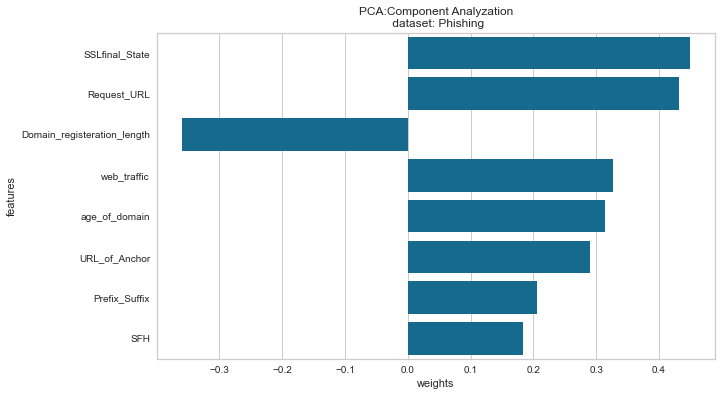

In [36]:
plot_pca(0,8)

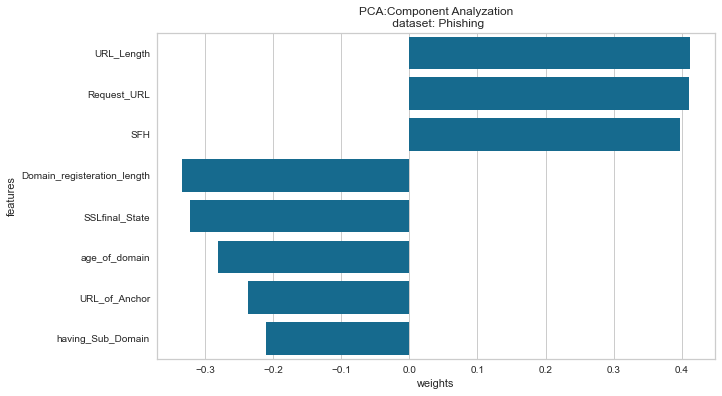

In [37]:
plot_pca(1,8)

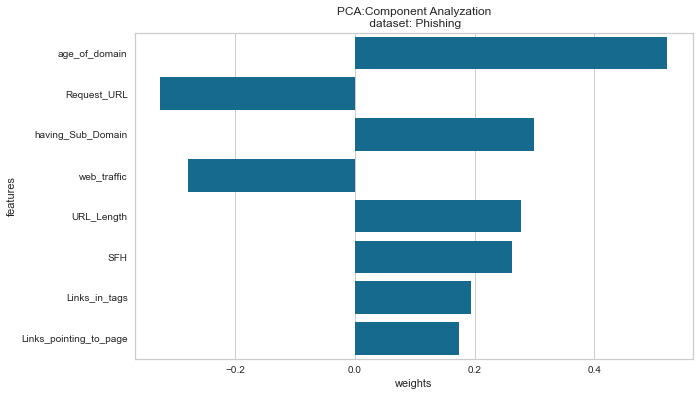

In [38]:
plot_pca(2,8)

In [13]:
def pca(X, cutoff_per, var_threashold):
    pca = PCA(cutoff_per, random_state=7)
    pca.fit(X)
    pca.explained_variance_

    row_index = range(1, pca.explained_variance_.shape[0] + 1)
    ev = pd.Series(data=pca.explained_variance_, index=row_index)
    evr = pd.Series(data=pca.explained_variance_ratio_, index=row_index)
    eigen = pd.Series(data=pca.singular_values_, index=row_index)  
    
    pca_stats_df = pd.DataFrame()
    pca_stats_df['pca_stats_df'] = ev
    pca_stats_df['e-variance-ratio'] = evr
    pca_stats_df['eigen'] = eigen

    var_above = pca_stats_df[pca_stats_df['pca_stats_df'] >= var_threashold]
    #print(pca_stats_df)
    print("Original PCA components")
    print(pca_stats_df)
    print(f"Threshold PCA components variance >= [{var_threashold:.2f}%]")
    print(var_above)
  
    constrained_cols = var_above.index-1
    X_pca_projected = pca.transform(X)

    return pd.DataFrame(X_pca_projected).filter(constrained_cols, axis=1)

0     64.784522
1     52.221600
2     41.332125
3     40.363161
4     38.723252
5     33.742525
6     32.154062
7     30.942638
8     30.154314
9     28.147255
10    25.310749
11    25.275488
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

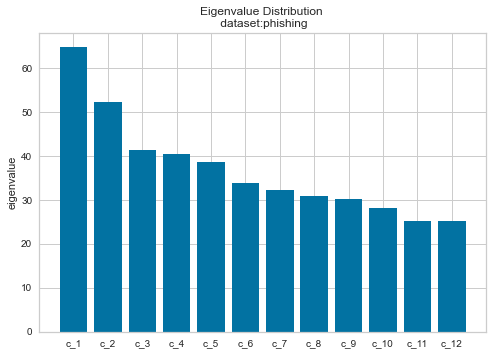

In [28]:
pca_1 = PCA(12, random_state=7)
pca_1.fit(X_train)

#row_index = range(1, pca_1.explained_variance_.shape[0] + 1)
eigen = pd.Series(data=pca_1.singular_values_, )
print(eigen) 

data = [64.784522, 52.221600, 41.332125, 40.363161,38.723252,  33.742525, 
       
        32.154062, 30.942638,30.154314,28.147255,25.310749,25.275488]

x = ['c_1', 'c_2','c_3', 'c_4','c_5', 'c_6',
    'c_7', 'c_8','c_9', 'c_10','c_11', 'c_12']
#data_ev = [ev[0],ev[1],ev[2],ev[3],ev[4],ev[5],ev[6],ev[7],ev[8],ev[9],ev[10],ev[11]]
#data_eigen = [eigen[0],eigen[1],eigen[2],eigen[3],eigen[4],eigen[5],eigen[6],eigen[7],
#             eigen[8],eigen[9],eigen[10],eigen[11]]

#bar_width = 0.1
#index_ev = np.arange(len(data_ev))
#index_eigen = index_ev + bar_width

plt.bar(x, data)

#plt.legend(loc="best")
#plt.xticks(index_train + bar_width/2, x)
#plt.ylim((0.8, 1.0))
plt.ylabel('eigenvalue')
plt.title('Eigenvalue Distribution \n dataset:phishing')
plt.show


In [103]:
print(f"\n---- RUNNING PCA -------")
X_pca_proj_test = pca(X_train, 0.89, 0.55)


---- RUNNING PCA -------
Original PCA components
    pca_stats_df  e-variance-ratio      eigen
1       2.138071          0.209353  64.784522
2       1.389249          0.136031  52.221600
3       0.870272          0.085214  41.332125
4       0.829946          0.081266  40.363161
5       0.763877          0.074796  38.723252
6       0.580009          0.056793  33.742525
7       0.526686          0.051571  32.154062
8       0.487747          0.047758  30.942638
9       0.463211          0.045356  30.154314
10      0.403601          0.039519  28.147255
11      0.326355          0.031956  25.310749
12      0.325446          0.031867  25.275488
Threshold PCA components variance >= [0.55%]
   pca_stats_df  e-variance-ratio      eigen
1      2.138071          0.209353  64.784522
2      1.389249          0.136031  52.221600
3      0.870272          0.085214  41.332125
4      0.829946          0.081266  40.363161
5      0.763877          0.074796  38.723252
6      0.580009          0.056793  33

In [ ]:
A_ , C_, C_filtered, mean_ = ica_research(X_train, 21, 4)
pd.DataFrame(C_filtered)
def plot_ica_dists(C_df,labels_list):
#     C_df.plot.bar()
   
    r,c = C_df.shape;
    #print (r)
    #print (c)
    #fig, ax_val = plt.subplots(2, r//2, figsize=(3*7,7))
    fig, ax_val = plt.subplots(1, r, figsize=(r*7,7))
    ax = ax_val if type(ax_val) == np.ndarray else [ax_val]
    for i in range(r):
        ax[i].bar( C_df.columns, C_df.iloc[i,:].values)
        ax[i].set_xlabel('Attributes')
        ax[i].set_xticks(C_df.columns)
        ax[i].set_xticklabels(labels_list)
        ax[i].tick_params(axis='x', labelrotation = -90)
        ax[i].set_ylabel('weight')
        ax[i].set_title(f"ICA Weight Distribution Component Projection[{C_df.index[i]}]\n dataset: Phishing")
    fig.tight_layout()
    plt.show()

plot_ica_dists(C_filtered, LABELS)

## ICA

In [132]:
ks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
def find_ica(ks,X):
    results = []
    for k in ks:
        transformerlarge = FastICA(n_components=k,
                random_state=0)
        X_transformed_large = transformerlarge.fit_transform(X)
        results.append(kurtosis(X_transformed_large))#.mean()
    return results

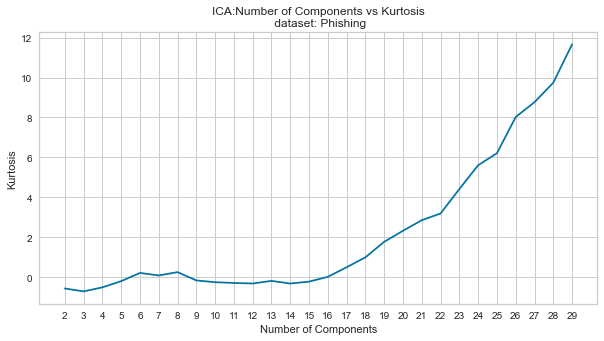

In [86]:
ks = range(2,30)
results = find_ica(ks,X_train)
rs = []
for r in results:
    rs.append(r.mean())
plt.title('ICA:Number of Components vs Kurtosis\n dataset: Phishing')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.xticks(range(28),ks)
plt.plot(rs)

In [15]:
should_whiten = True
transformerlarge = FastICA(n_components=21,
                random_state=7, whiten=should_whiten, max_iter=10000)
X_transformed_large = transformerlarge.fit_transform(X_train)

In [16]:
def plot_ica(vector_num,top_comp,transformerlarge=transformerlarge):
    v_1 = transformerlarge.components_[vector_num]
    comps = pd.DataFrame(list(zip(v_1, X.columns.values)), 
                             columns=['weights', 'features'])
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(top_comp)
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   color = "C0",
                   #palette="Blues_d"
                  )
    ax.set_title("ICA Component Makeup, Component #" + str(vector_num))
    plt.show()

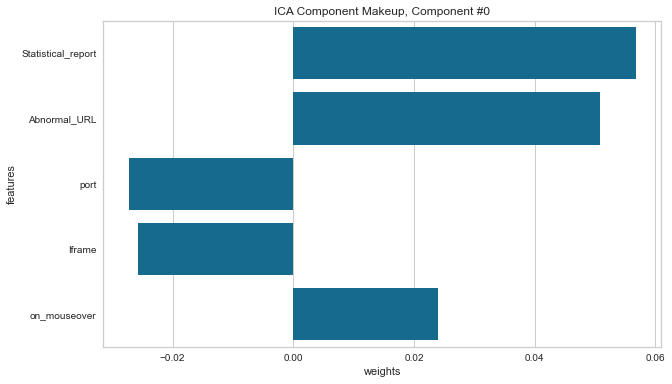

In [143]:
plot_ica(0,5)

In [17]:
def max_kurtosis_indexes(X_projected, cutoff):
    tmp = pd.DataFrame(X_projected)
    tmp = tmp.kurt(axis=0)
    kurt = tmp.sort_values(ascending=False)
        
    max_k = kurt[0:cutoff]
    print(f"Top-{cutoff} Max Kurtosis -- ")
    print(max_k)
    print(max_k.index)
    return max_k.index

In [18]:
def ica_max_kurtosis(X, cutoff, dim=0):

    if dim == 0:
        dim = X.shape[1]-1
    elif dim < cutoff:
        dim = cutoff

    ica = FastICA(random_state=7)
    ica.set_params(n_components=dim)
    X_projected = ica.fit_transform(X)

    max_k_idexes = max_kurtosis_indexes(X_projected,cutoff)
    
    X_proj_df = pd.DataFrame(X_projected)
    X_proj_df  = X_proj_df.filter( max_k_idexes, axis=1 )
        
    return X_proj_df

In [19]:
def ica_research(X, dim, cutoff):
    should_whiten = True
    ica = FastICA(dim, random_state=7, whiten=should_whiten, max_iter=10000)
    S_ = ica.fit_transform(X)
    A_ = ica.mixing_
    C_ = ica.components_
    
    max_k_idexes = max_kurtosis_indexes(S_,cutoff)
    
    mean_ = ica.mean_ if should_whiten else 0
    print(f"X.shape = {X.shape}")
    C_filtered = pd.DataFrame(C_).filter( max_k_idexes, axis=0)
    return A_, C_, C_filtered, mean_

In [45]:
phishing.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [49]:
A_ , C_, C_filtered, mean_ = ica_research(X_train, 21, 10)


Top-10 Max Kurtosis -- 
18    14.888658
8     13.558553
0      8.950631
12     7.741231
6      7.593036
14     7.403969
5      3.958499
10     3.084180
7      2.107683
20     1.367051
dtype: float64
Int64Index([18, 8, 0, 12, 6, 14, 5, 10, 7, 20], dtype='int64')
X.shape = (1964, 30)


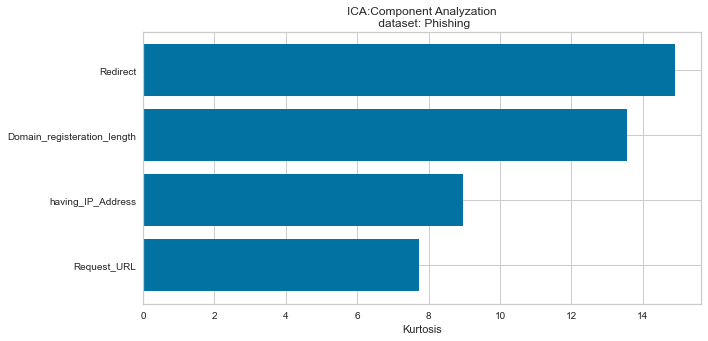

In [43]:
labels = ["Redirect","Domain_registeration_length","having_IP_Address", "Request_URL"]
labels.reverse()
data = [7.741231, 8.950631,13.558553,14.888658]

fig, ax = plt.subplots()
b = ax.barh(range(len(labels)), data)

for rect in b:
    w = rect.get_width()
    #ax.text(w, rect.get_y() + rect.get_height()/2, '%d' % int(w), ha='left', va='center')

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Kurtosis')

#plt.xticks(())
plt.title('ICA:Component Analyzation\n dataset: Phishing')
plt.show()

Top-4 Max Kurtosis -- 
18    14.888658
8     13.558553
0      8.950631
12     7.741231
dtype: float64
Int64Index([18, 8, 0, 12], dtype='int64')
X.shape = (1964, 30)


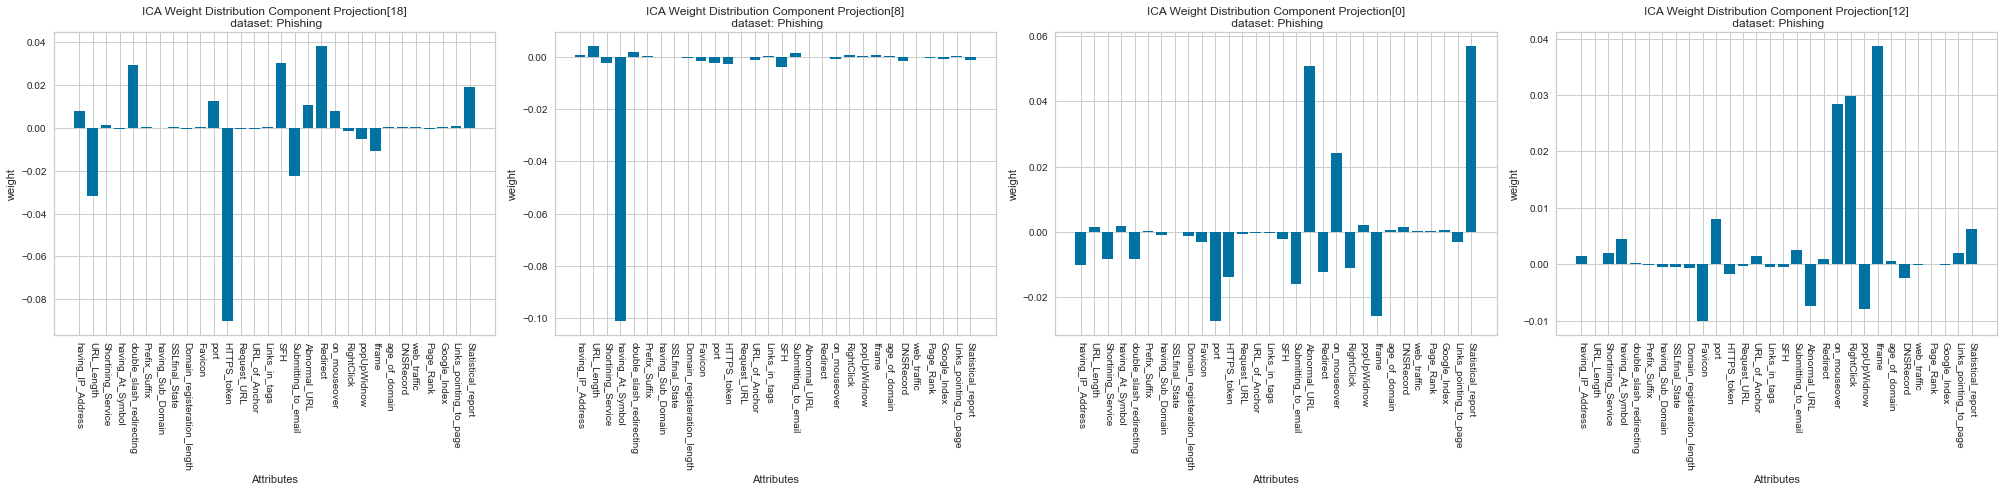

In [66]:
A_ , C_, C_filtered, mean_ = ica_research(X_train, 21, 4)
pd.DataFrame(C_filtered)
def plot_ica_dists(C_df,labels_list):
#     C_df.plot.bar()
   
    r,c = C_df.shape;
    #print (r)
    #print (c)
    #fig, ax_val = plt.subplots(2, r//2, figsize=(3*7,7))
    fig, ax_val = plt.subplots(1, r, figsize=(r*7,7))
    ax = ax_val if type(ax_val) == np.ndarray else [ax_val]
    for i in range(r):
        ax[i].bar( C_df.columns, C_df.iloc[i,:].values)
        ax[i].set_xlabel('Attributes')
        ax[i].set_xticks(C_df.columns)
        ax[i].set_xticklabels(labels_list)
        ax[i].tick_params(axis='x', labelrotation = -90)
        ax[i].set_ylabel('weight')
        ax[i].set_title(f"ICA Weight Distribution Component Projection[{C_df.index[i]}]\n dataset: Phishing")
    fig.tight_layout()
    plt.show()

plot_ica_dists(C_filtered, LABELS)


## Randomized Projections

In [172]:
rs = [0, 77, 888, 5678, 98765, 543216, 123456789]
ks = [5,8,10,12,15,18,20]
ks = range(2,21)
def find_rand_proj(ks=ks,X=X):
    results = []
    for k in ks:
        error = 0
        for i in rs:
            gauRP = GaussianRandomProjection(random_state=i,n_components=k)

            gau = gauRP.fit_transform(X)
            
            X_transformed_large = gauRP.fit_transform(X)
            error += mean_squared_error(np.dot(gau,gauRP.components_), X)
        results.append(error/k)
    return results

In [173]:
randp_result = find_rand_proj()

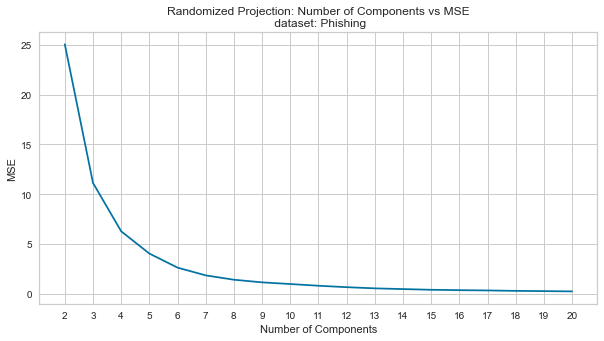

In [174]:
plt.title('Randomized Projection: Number of Components vs MSE\n dataset: Phishing')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.xticks(range(len(ks)),ks)
plt.plot(randp_result)

eps=0.100000 and n_samples=1964 lead to a target dimension of 6499 which is larger than the original space with n_features=30
Optimal no. of components as per GRP: 9


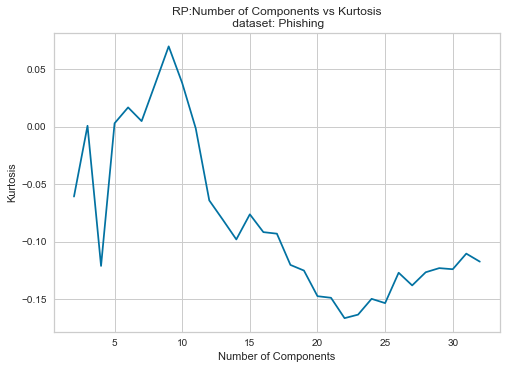

In [18]:
# Random Projections (Initial Try)
initial_features_n = 32
try:
  proj_grp = random_projection.GaussianRandomProjection(random_state=7)
  X_transformed = proj_grp.fit_transform(X_train)
except Exception as e:
  print(e)

kurtosis_grp = []
random_states = [0, 77, 888, 5678, 98765]
for dimension in range(2, initial_features_n + 1):
  k_vals_grp = []
  for rng in random_states:
    for iter in range(500):
          grp = random_projection.GaussianRandomProjection(n_components=dimension, random_state=7)
          grp_x_transform = grp.fit_transform(X_train)
          kurtosis_vals = kurtosis(grp_x_transform)
          k_vals_grp.append(kurtosis_vals)
  kurtosis_grp.append(np.mean(k_vals_grp))
optimal_features_grp = np.argmax(kurtosis_grp) + 2
print('Optimal no. of components as per GRP:', optimal_features_grp)

plt.title("RP:Number of Components vs Kurtosis\n dataset: Phishing")
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.plot(range(2, initial_features_n + 1), kurtosis_grp)
plt.grid(True)
plt.show()


In [19]:
k_vals = []
reconstruction_error = []

for f_n in range(2, initial_features_n + 1):
    ica = FastICA(n_components=f_n, max_iter=10000, random_state=0, tol=1.5)
    ica_x_transformed = ica.fit_transform(X_train)
    #kurtosis_vals = kurtosis(ica_x_transformed)
    #k_vals.append(np.mean(kurtosis_vals))
    tmp = pd.DataFrame(ica_x_transformed)
    tmp = tmp.kurt(axis=0)
    k_vals.append(tmp.abs().mean())


    x_projected = ica.inverse_transform(ica_x_transformed)

for dimension in range(2, initial_features_n + 1):
  proj_grp = random_projection.GaussianRandomProjection(n_components=dimension, random_state=7)
  proj_grp.fit(X_train)
  components =  proj_grp.components_ # shape=(5, 11) 
  p_inverse = np.linalg.pinv(components.T) # shape=(5, 11) 

  reduced_data = proj_grp.transform(X_train) 
  reconstructed= reduced_data.dot(p_inverse)  
  #print("reduced_data -",reduced_data.shape, "  reconstructed -", reconstructed.shape)
  reconstruction_error.append(mean_squared_error(X_train, reconstructed))
  
  if(dimension == optimal_features_grp):
    chosen_error = ((X_train - x_projected) ** 2).mean()

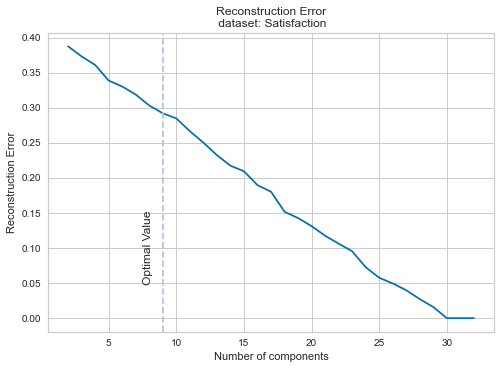

In [20]:
plt.plot(range(2, initial_features_n+1), reconstruction_error)
plt.axvline(optimal_features_grp, linestyle='--', color="lightsteelblue")
plt.text(optimal_features_grp-1.5, 0.05,'Optimal Value', rotation=90)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error\n dataset: Satisfaction')
plt.grid(True)
plt.show()

In [20]:
def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

def reconstruction_error(projections, x):
    w = projections.components_
    if sps.issparse(w):
        w = w.todense()
    p = pinv(w)
    reconstructed = ((p@w)@(x.T)).T  # Unproject projected data
    
    errors = mean_squared_error(x,reconstructed)

    return np.nanmean(errors)

def rca_research(X, title):
    dims = range(2, X.shape[1] + 1)
    recon_dict = defaultdict(dict)

    #r_states = [89143, 92, 1081244453, 8772, 212]
    #r_states = [0, 77, 888, 5678, 98765, 543216, 123456789]
    #r_states = [888, 5678, 98765, 543216, 123456789]
    r_states = [0, 77, 888, 5678, 98765, 543216, 6789432, 98273615, 123456789, 7]
    i = 0
    for r,dim in product(r_states,dims):
        rp = RCA(random_state=r, n_components=dim)
        rp.fit(X)
        recon_dict[dim][i%len(r_states)] = reconstruction_error(rp, X)
        i += 1
        
    tmp = pd.DataFrame(recon_dict).T
    print(tmp)
    mean_recon_df = tmp.mean(axis=1)
    mean_recon = mean_recon_df.tolist()
    std_recon = tmp.std(axis=1).tolist()
    
    print("*** reconstruction MSE***")
    print(mean_recon_df)
    


    fig, ax1 = plt.subplots()
    ax1.plot(dims,mean_recon, 'C0-')
    ax1.set_xlabel('Number of Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Error', color='C0')
    ax1.tick_params('y', colors='C0')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(dims,std_recon, linestyle='--', color='darkorange', linewidth=0.75)
    ax2.set_ylabel('STD Reconstruction Error', color='darkorange' )
    ax2.tick_params('y', colors='darkorange')
    plt.grid(False)

    plt.title("Random Components: 10 Restarts \n"+ title)
    fig.tight_layout()
    plt.show()

In [21]:
def rp(X, dim, r_state=7):
    rp = RCA(random_state=r_state, n_components=dim)
    fitted = rp.fit(X)
    X_rca_projected = rp.transform(X)
    return pd.DataFrame(X_rca_projected)

               0             9             8             7             6  \
2   3.900769e-01  3.844386e-01  3.799681e-01  3.987967e-01  3.897799e-01   
3   3.638344e-01  3.650350e-01  3.947185e-01  3.477439e-01  3.491606e-01   
4   3.518593e-01  3.781482e-01  3.483864e-01  3.310606e-01  3.533049e-01   
5   3.528522e-01  3.173560e-01  3.588337e-01  3.325583e-01  3.164415e-01   
6   2.904382e-01  3.142293e-01  3.341384e-01  2.836335e-01  3.646133e-01   
7   2.868370e-01  3.288662e-01  3.052802e-01  3.369169e-01  2.944041e-01   
8   2.983125e-01  2.543463e-01  3.292281e-01  2.735101e-01  2.795771e-01   
9   2.695137e-01  3.193302e-01  2.706426e-01  2.702924e-01  3.025154e-01   
10  2.866292e-01  2.640309e-01  2.800370e-01  2.906267e-01  2.621892e-01   
11  2.707833e-01  2.446011e-01  2.630435e-01  2.685352e-01  2.953543e-01   
12  2.097546e-01  2.646976e-01  2.473816e-01  2.946791e-01  2.294541e-01   
13  2.457373e-01  2.359512e-01  2.585270e-01  2.216996e-01  2.224714e-01   
14  2.193813

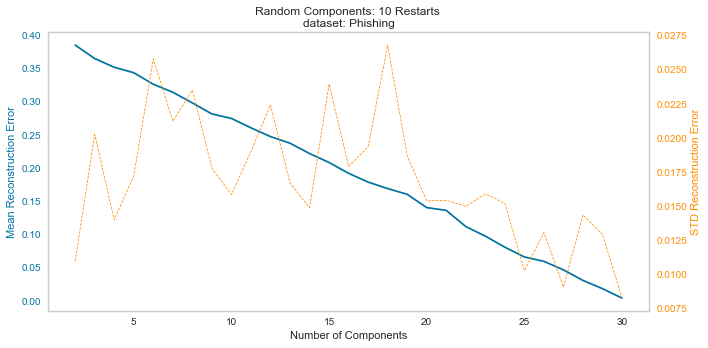

In [187]:
rca_research(X_train, 'dataset: Phishing')

               0             4             3             2         1
2   3.799681e-01  3.987967e-01  3.897799e-01  3.660033e-01  0.396880
3   3.947185e-01  3.477439e-01  3.491606e-01  3.917317e-01  0.365035
4   3.483864e-01  3.310606e-01  3.676371e-01  3.518593e-01  0.378148
5   3.588337e-01  3.678548e-01  3.458384e-01  3.528522e-01  0.317356
6   3.646133e-01  3.549380e-01  3.426366e-01  2.904382e-01  0.314229
7   3.370175e-01  3.357315e-01  2.812210e-01  2.868370e-01  0.336917
8   3.088811e-01  2.895587e-01  3.148298e-01  3.292281e-01  0.322030
9   2.782402e-01  2.632381e-01  3.193302e-01  2.845874e-01  0.286508
10  2.734882e-01  2.866292e-01  2.621892e-01  2.998026e-01  0.249577
11  2.797359e-01  2.685352e-01  2.953543e-01  2.466192e-01  0.258519
12  2.473816e-01  2.946791e-01  2.294541e-01  2.396321e-01  0.250154
13  2.585270e-01  2.216996e-01  2.224714e-01  2.466032e-01  0.235951
14  2.193881e-01  2.129952e-01  2.149403e-01  2.193813e-01  0.255819
15  1.926571e-01  2.309446e-01  2.

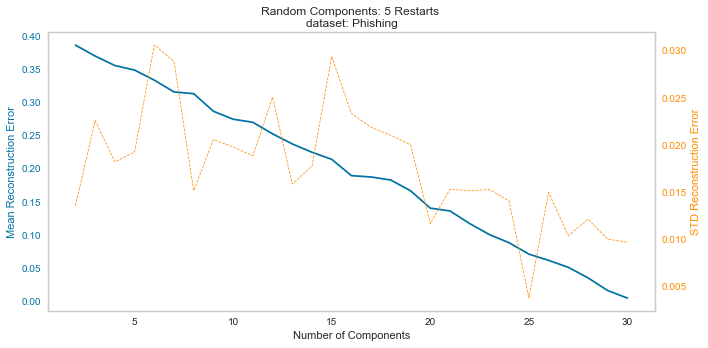

In [188]:
def rca_research_2(X, title):
    dims = range(2, X.shape[1] + 1)
    recon_dict = defaultdict(dict)

    #r_states = [89143, 92, 1081244453, 8772, 212]
    #r_states = [0, 77, 888, 5678, 98765, 543216, 123456789]
    r_states = [888, 5678, 98765, 543216, 123456789]
    #r_states = [0, 77, 888, 5678, 98765, 543216, 6789432, 98273615, 123456789, 7]
    i = 0
    for r,dim in product(r_states,dims):
        rp = RCA(random_state=r, n_components=dim)
        rp.fit(X)
        recon_dict[dim][i%len(r_states)] = reconstruction_error(rp, X)
        i += 1
        
    tmp = pd.DataFrame(recon_dict).T
    print(tmp)
    mean_recon_df = tmp.mean(axis=1)
    mean_recon = mean_recon_df.tolist()
    std_recon = tmp.std(axis=1).tolist()
    
    print("*** reconstruction MSE***")
    print(mean_recon_df)
    


    fig, ax1 = plt.subplots()
    ax1.plot(dims,mean_recon, 'C0-')
    ax1.set_xlabel('Number of Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Error', color='C0')
    ax1.tick_params('y', colors='C0')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(dims,std_recon, linestyle='--', color='darkorange', linewidth=0.75)
    ax2.set_ylabel('STD Reconstruction Error', color='darkorange' )
    ax2.tick_params('y', colors='darkorange')
    plt.grid(False)

    plt.title("Random Components: 5 Restarts \n"+ title)
    fig.tight_layout()
    plt.show()
def rp_2(X, dim, r_state=7):
    rp_2 = RCA(random_state=r_state, n_components=dim)
    fitted = rp.fit(X)
    X_rca_projected = rp.transform(X)
    return pd.DataFrame(X_rca_projected)

rca_research_2(X_train, 'dataset: Phishing')


## Random Forest 

In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(X_train, y_train)
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_importance_sorted_idx
clf.feature_importances_[tree_importance_sorted_idx[-7:]]

array([0.03639109, 0.04421372, 0.04722729, 0.11271653, 0.11453704,
       0.19200859, 0.27292784])

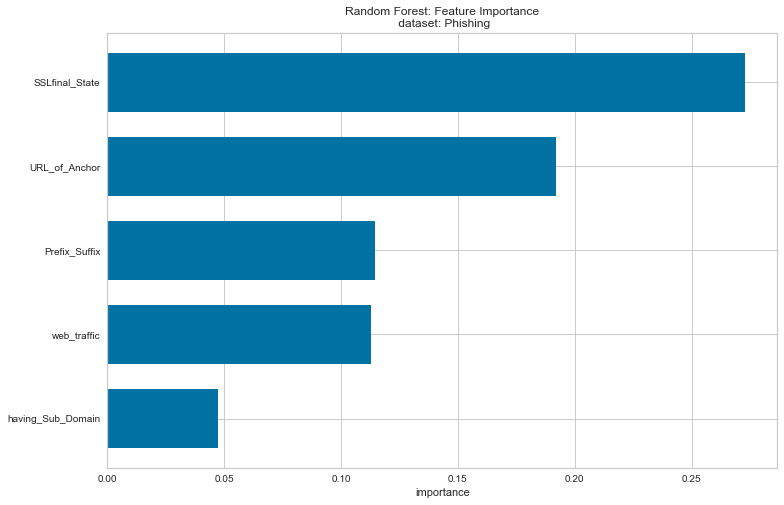

In [18]:
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

ax1.barh(tree_indices[-5:],
         clf.feature_importances_[tree_importance_sorted_idx[-5:]], height=0.7)
ax1.set_yticklabels(X.columns[tree_importance_sorted_idx][-5:])
ax1.set_yticks(tree_indices[-5:])
ax1.set_xlabel('importance')
plt.title('Random Forest: Feature Importance\n dataset: Phishing')
plt.show()

In [26]:
def rfc_research(X,y):
                 
        rfc = RandomForestClassifier(n_estimators=10000, class_weight='balanced', random_state=7, n_jobs=-1)
        fs = rfc.fit(X,y).feature_importances_
        return fs
        
def rfc(X,y):
                 
        rfc = RandomForestClassifier(n_estimators=10000, class_weight='balanced', random_state=7, n_jobs=-1)
        fs = rfc.fit(X,y).feature_importances_
        indexes_found = np.where(fs >= 0.1)
        print("index:",indexes_found[0])
        
        X_reduced = pd.DataFrame(X)
        #print("X_reduced",X_reduced)
        filter_columns = [list(X_reduced.columns)[i] for i in indexes_found[0]] 
        #print(filter_columns)
        X_reduced = X_reduced.filter(filter_columns, axis=1)
        #print(X_reduced)
        
        return X_reduced

In [27]:
#Research for Random Forest
important = rfc_research(X_train, y_train)
important_df = pd.DataFrame(columns=LABELS)
df_length = len(important_df)
important_df.loc[df_length] = important
print("*** importance ***:")
print(pd.Series(important))

print(rfc(X_train, y_train))

*** importance ***:
0     0.002048
1     0.005146
2     0.002614
3     0.001319
4     0.002248
5     0.115105
6     0.050625
7     0.278246
8     0.028230
9     0.004014
10    0.002328
11    0.004994
12    0.018768
13    0.197217
14    0.029781
15    0.004167
16    0.003767
17    0.002397
18    0.001900
19    0.002832
20    0.001280
21    0.004806
22    0.002222
23    0.036942
24    0.015746
25    0.108506
26    0.040597
27    0.013381
28    0.016134
29    0.002640
dtype: float64
index: [ 5  7 13 25]
      Prefix_Suffix  SSLfinal_State  URL_of_Anchor  web_traffic
367              -1              -1              0            1
1307              0               1              0            1
1550              1               1              1            1
879               0               1              0            1
2281             -1              -1             -1           -1
...             ...             ...            ...          ...
211               0               1           

# Projections

In [28]:
print(f"\n---- RUNNING PCA -------")
X_pca_proj = pca(X_train, 0.89, 0.55)

print(f"---- RUNNING ICA -------")
X_ica_proj = ica_max_kurtosis(X_train ,4, dim=21)

print(f"\n---- RUNNING RP -------")
r_states = [0, 77, 888, 5678, 98765, 543216, 6789432, 98273615, 123456789, 7]
X_rp_proj = []
for r in r_states:
    X_rp = rp(X_train, 7, r)
    X_rp_proj.append(X_rp)

print(f"\n---- RUNNING Random Forest RFC -------")
X_rfc_proj = rfc(X_train,y_train)

print(f"Shapes for rfc: {X_rfc_proj.shape} ")


---- RUNNING PCA -------
Original PCA components
    pca_stats_df  e-variance-ratio      eigen
1       2.138071          0.209353  64.784522
2       1.389249          0.136031  52.221600
3       0.870272          0.085214  41.332125
4       0.829946          0.081266  40.363161
5       0.763877          0.074796  38.723252
6       0.580009          0.056793  33.742525
7       0.526686          0.051571  32.154062
8       0.487747          0.047758  30.942638
9       0.463211          0.045356  30.154314
10      0.403601          0.039519  28.147255
11      0.326355          0.031956  25.310749
12      0.325446          0.031867  25.275488
Threshold PCA components variance >= [0.55%]
   pca_stats_df  e-variance-ratio      eigen
1      2.138071          0.209353  64.784522
2      1.389249          0.136031  52.221600
3      0.870272          0.085214  41.332125
4      0.829946          0.081266  40.363161
5      0.763877          0.074796  38.723252
6      0.580009          0.056793  33

## Kmeans with Projections

In [53]:
print("Starting PCA scores")
scores_df_pca = get_kmean_scores(X_pca_proj, y_train, 10)

print("Starting ICA score")
scores_df_ica = get_kmean_scores(X_ica_proj, y_train, 10)

scores_df_rp = []
for i in range(len(X_rp_proj)):
    print(f"Starting RP scores [{i}]")
    scores_df_rp.append(get_kmean_scores(X_rp_proj[i], y_train, 10))
    
print("Starting RFC scores")
scores_df_rfc = get_kmean_scores(X_rfc_proj,  y_train, 10)

Starting PCA scores
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting ICA score
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting RP scores [0]
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting RP scores [1]
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting RP scores [2]
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting RP scores [3]
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10

In [55]:
def merge_scores_df_list(scores_df_list):
    scores_all_df = pd.DataFrame(scores_df_list[0])
    for i in range(1,len(scores_df_list)):
        scores_all_df += scores_df_PCAlist[i]
    
    scores_all_df = scores_all_df / len(scores_df_list)
    return scores_all_df

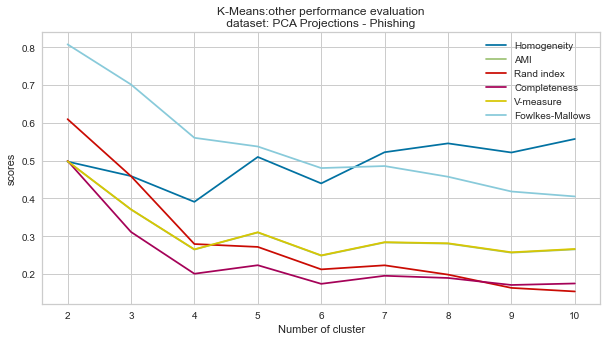

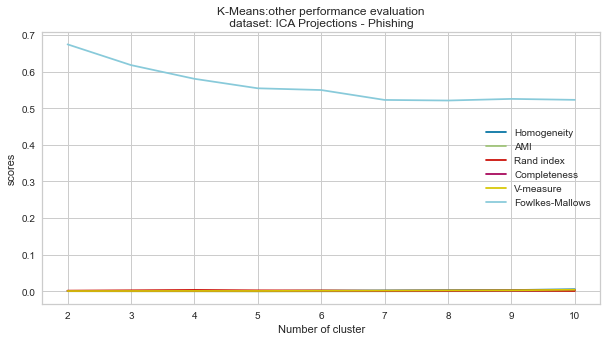

(9, 7), (9, 7)


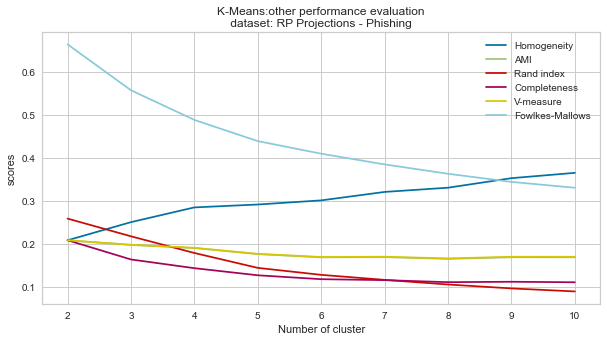

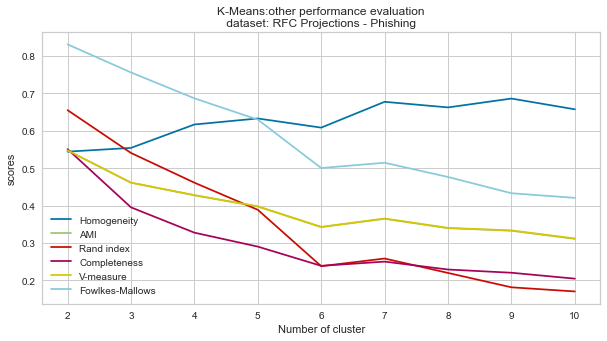

In [56]:
plot_elbow_kmeans(scores_df_pca, 'PCA Projections - Phishing')

plot_elbow_kmeans(scores_df_ica, 'ICA Projections - Phishing')

scores_all_df_rp = merge_scores_df_list(scores_df_rp)
print(f"{scores_all_df_rp.shape}, {scores_df_rp[0].shape}")
plot_elbow_kmeans(scores_all_df_rp, 'RP Projections - Phishing')

plot_elbow_kmeans(scores_df_rfc, 'RFC Projections - Phishing')


In [34]:
def plot_km_pairwise(X, N, title):
    
    km = KMeans(n_clusters=N,random_state=7, max_iter=10000)
    km.fit(X)
    pred_clusters = km.predict(X)


    filtred_df = X.copy()  
    x_vars = filtred_df.columns     
    filtred_df['pred'] = pred_clusters  
    y_vars = filtred_df.columns[0:2]
    #print("y_vars:",y_vars)
    
    ax = sns.PairGrid(filtred_df, hue="pred", x_vars=x_vars, y_vars=y_vars)
    #label_list = ["SSLfinal_State", "Request_URL", "Domain_registeration_length", "web_traffic", "age_of_domain", "URL_of_Anchor"]
    #ax.set_xticklabels(label_list)
    ax.map_diag(sns.histplot)
    ax.map_offdiag(sns.scatterplot)
    ax.add_legend()
    ax.fig.suptitle("%s, Kmeans, k-cluster = %d"%(title,N), y=1.08)

### PCA

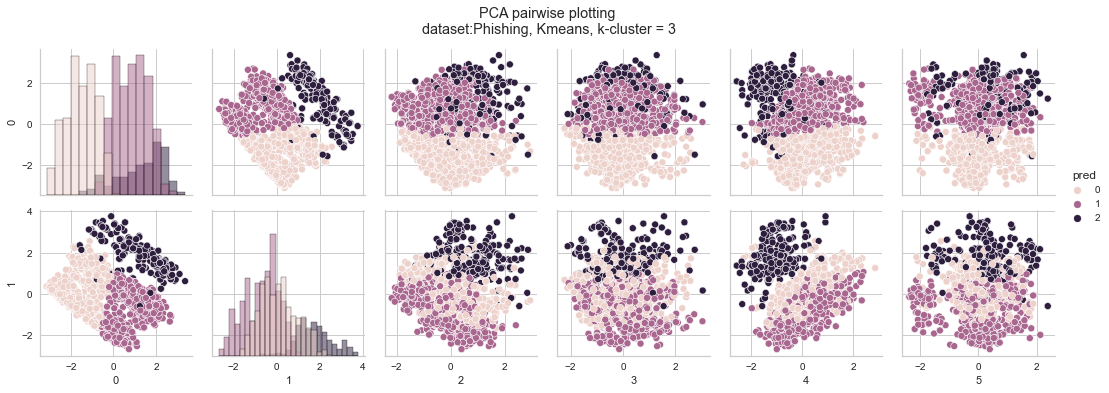

In [35]:
plot_km_pairwise(X_pca_proj, 3, 'PCA pairwise plotting\n dataset:Phishing')

### ICA

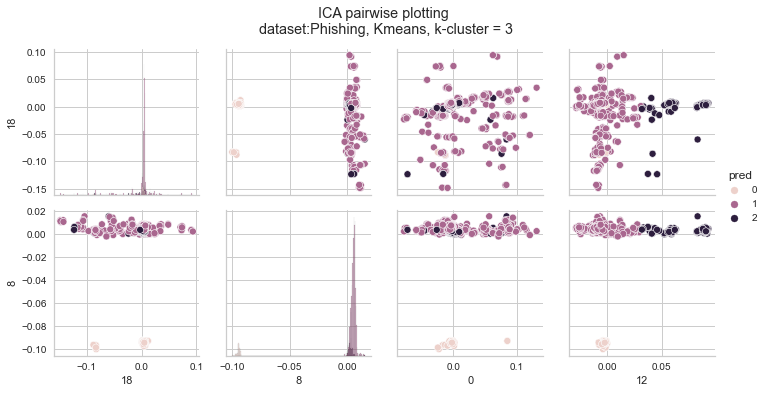

In [36]:
plot_km_pairwise(X_ica_proj, 3, 'ICA pairwise plotting\n dataset:Phishing')

### RP

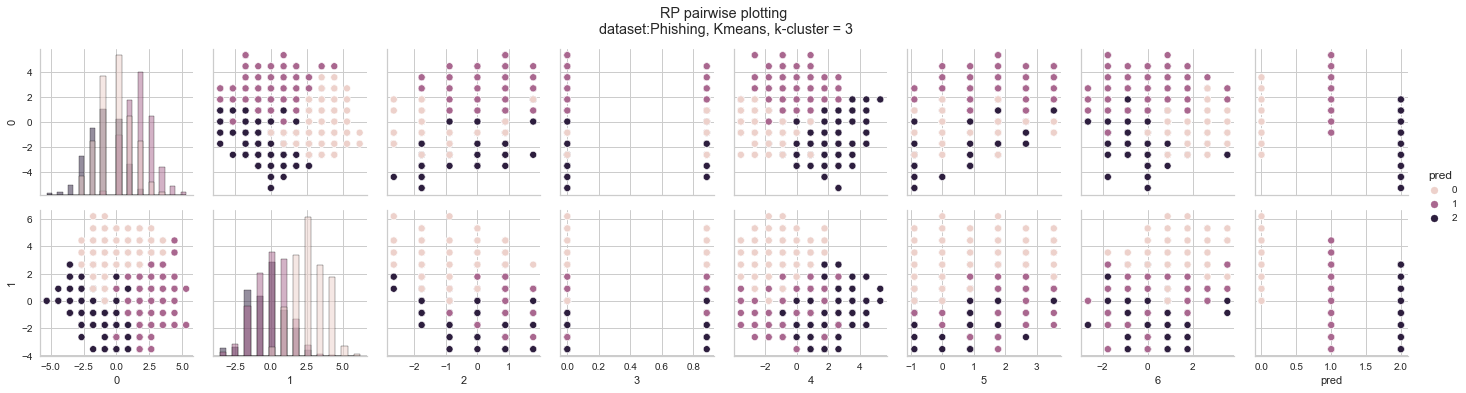

In [174]:
plot_km_pairwise(X_rp_proj[1], 3, 'RP pairwise plotting\n dataset:Phishing')

### RFC

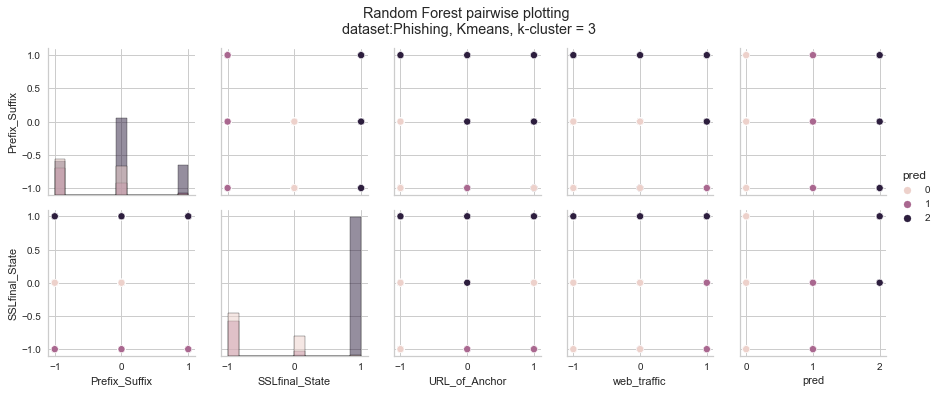

In [29]:
plot_km_pairwise(X_rfc_proj, 3, 'Random Forest pairwise plotting\n dataset:Phishing')

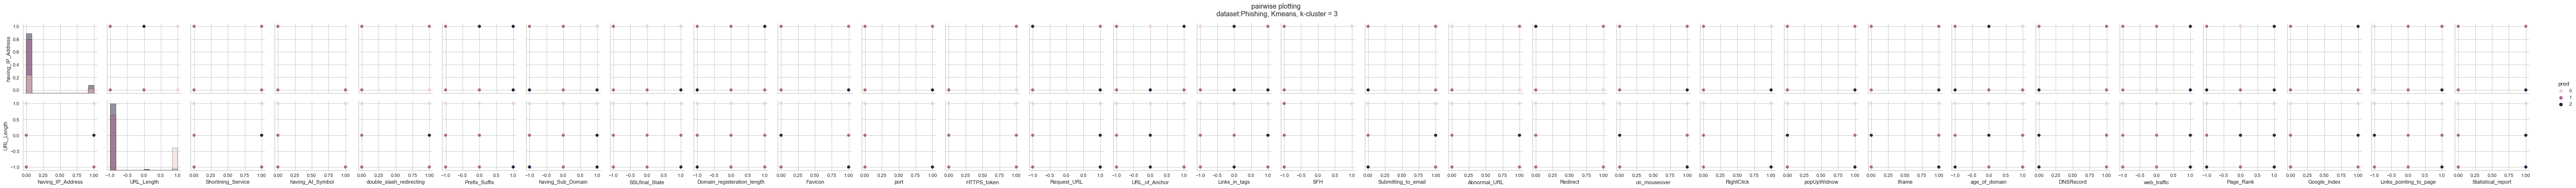

In [166]:
plot_km_pairwise(pd.DataFrame(X_train), 3, 'pairwise plotting\n dataset:Phishing')

## EM with Projections

In [52]:
print("Starting PCA scores")
scores_df_pca = get_em_scores(X_pca_proj, y_train, 10)

print("Starting ICA scores")
scores_df_ica = get_em_scores(X_ica_proj, y_train, 10)

scores_df_rp = []
for i in range(len(X_rp_proj)):
    print(f"Starting RP scores [{i}]")
    scores_df_rp.append(get_em_scores(X_rp_proj[i], y_train, 10))
print("Starting RFC scores")
scores_df_rfc = get_em_scores(X_rfc_proj, y_train, 10)

Starting PCA scores
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting ICA scores
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting RP scores [0]
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting RP scores [1]
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting RP scores [2]
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10
Starting RP scores [3]
 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 1

In [ ]:
def merge_scores_df_list(scores_df_list):
    scores_all_df = pd.DataFrame(scores_df_list[0])
    for i in range(1,len(scores_df_list)):
        scores_all_df += scores_df_list[i]
    
    scores_all_df = scores_all_df / len(scores_df_list)
    return scores_all_df

In [244]:
scores_df_rp[0]

n  sil_spherical  sil_tied  sil_diag  sil_full  bic_spherical  \
0   2.0       0.247594  0.206651  0.244388  0.122742   43142.708477   
1   3.0       0.195794  0.192162  0.192786  0.148795   42260.962839   
2   4.0       0.212947  0.196863  0.181549  0.095573   41605.119762   
3   5.0       0.202389  0.168428  0.191016  0.083134   41157.553353   
4   6.0       0.193210  0.184989  0.164555  0.085383   40581.414100   
5   7.0       0.178571  0.174392  0.170315 -0.006837   40344.140269   
6   8.0       0.208839  0.192341  0.193998  0.162572   40274.626793   
7   9.0       0.217711  0.194274  0.198068  0.070191   40154.219606   
8  10.0       0.209353  0.183741  0.185528 -0.011596   39907.225848   

       bic_tied      bic_diag      bic_full  hom_spherical  hom_tied  \
0  40018.184485  42945.072309  31554.286417       0.377798  0.323286   
1  39701.838623  42064.686064  39183.997881       0.299419  0.324512   
2  39313.154619  41161.713137  37569.030783       0.304595  0.038750   
3  39368.589739  40453.199083  30220.161082       0.347070  0.103680   
4  39099.544988  39969.226894  27732.957041       0.377076  0.245090   
5  39145.548398  39613.885679  24003.482959       0.391457  0.284517   
6  38668.656001  39708.434500  37554.605669       0.445998  0.281568   
7  38146.460646  39708.920261  26261.370328       0.474793  0.435847   
8  38158.497789  39217.265281  21298.802552       0.490738  0.457451   

   hom_diag  hom_full  fowm_spherical  fowm_tied  fowm_diag  fowm_full  \
0  0.369881  0.190512        0.732018   0.718926   0.725299   0.613002   
1  0.336958  0.314974        0.600951   0.635967   0.596259   0.561692   
2  0.280908  0.322808        0.531629   0.423218   0.482565   0.480874   
3  0.351035  0.230059        0.522765   0.403567   0.488069   0.480700   
4  0.366766  0.384301        0.453175   0.417453   0.442314   0.501422   
5  0.397047  0.325565        0.421722   0.387249   0.409980   0.448347   
6  0.504103  0.366610        0.434704   0.418700   0.423710   0.393464   
7  0.488174  0.447820        0.432890   0.440922   0.424039   0.429773   
8  0.497564  0.457030        0.411862   0.398166   0.386711   0.461216   

   ami_spherical  ami_tied  ami_diag  ami_full  
0       0.375954  0.331473  0.368178  0.193589  
1       0.252154  0.264536  0.267746  0.243218  
2       0.209333  0.026817  0.185895  0.216334  
3       0.216133  0.064655  0.213563  0.144481  
4       0.212192  0.139475  0.206102  0.226211  
5       0.207075  0.150122  0.209099  0.183052  
6       0.231795  0.152708  0.255226  0.185839  
7       0.241209  0.224647  0.245899  0.228972  
8       0.236445  0.221308  0.237078  0.238426

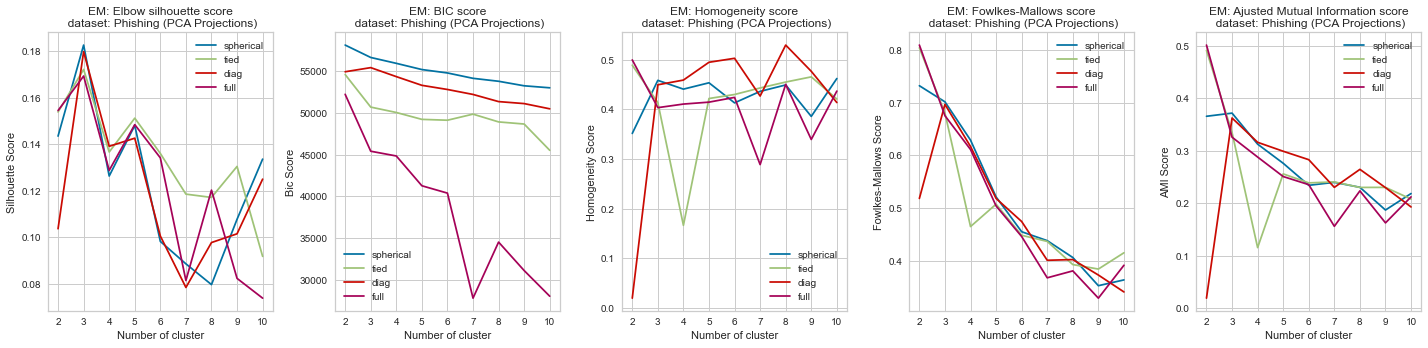

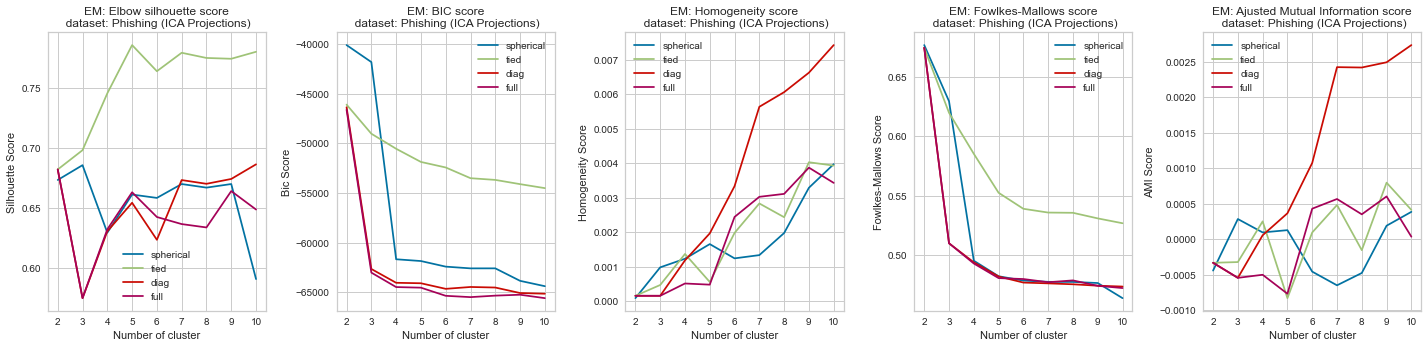

(9, 21), (9, 21)


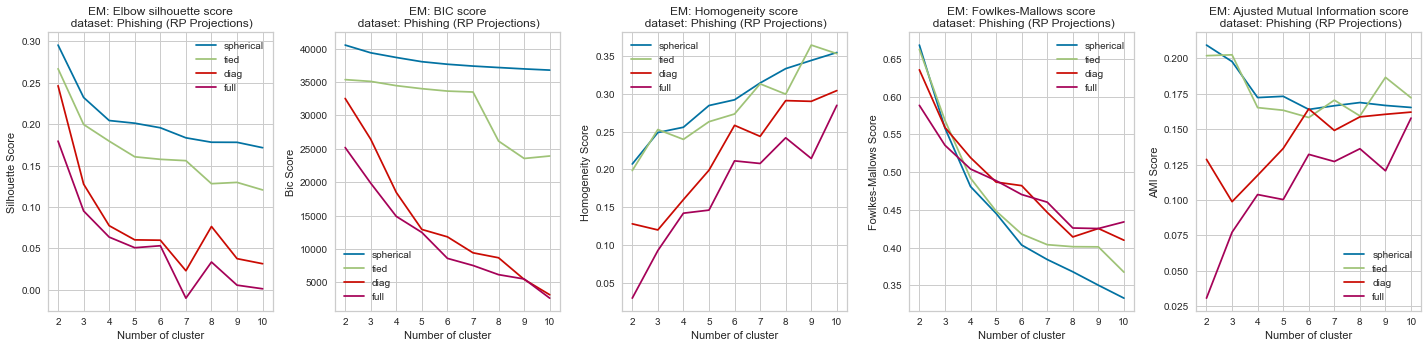

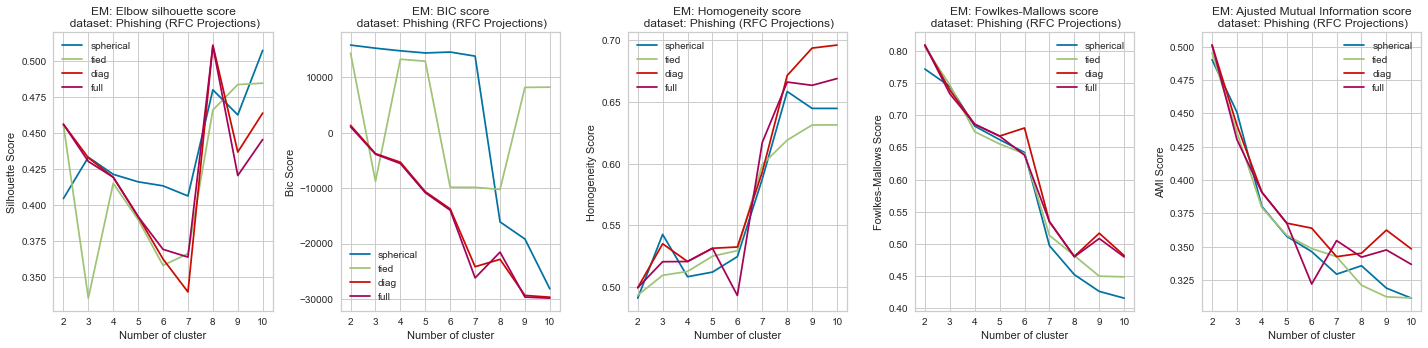

In [250]:
plot_elbow_em(scores_df_pca, 'Phishing (PCA Projections)')#, face_color='#FF8C00')

plot_elbow_em(scores_df_ica, 'Phishing (ICA Projections)')#, face_color='#ffffd4')

scores_all_df_rp = merge_scores_df_list(scores_df_rp)
print(f"{scores_all_df_rp.shape}, {scores_df_rp[0].shape}")
plot_elbow_em(scores_all_df_rp, 'Phishing (RP Projections)')#, face_color='#f6cefc')

plot_elbow_em(scores_df_rfc, 'Phishing (RFC Projections)')#, face_color='#cafffb')


In [57]:
def plot_em_pairwise(X, N, cv_type, title):
    
    gmm = GMM(n_components=N, covariance_type=cv_type, random_state=7)
    gmm.fit(X)
    pred_clusters = gmm.predict(X)


    filtred_df = pd.DataFrame(X)
 
    x_vars = filtred_df.columns    
    filtred_df['pred'] = pred_clusters

    
    y_vars = filtred_df.columns[0:2]
    ax = sns.PairGrid(filtred_df, hue="pred", x_vars=x_vars, y_vars=y_vars)
    ax.map_diag(sns.histplot)
    ax.map_offdiag(sns.scatterplot)
    ax.add_legend()
    ax.fig.suptitle("%s, EM, k-cluster = %d"%(title,N), y=1.08)

### PCA

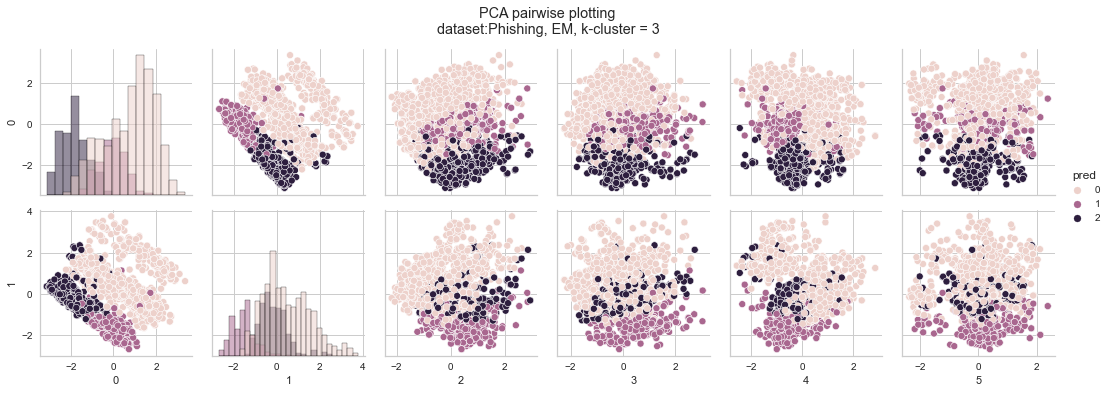

In [58]:
plot_em_pairwise(X_pca_proj, 3, 'tied','PCA pairwise plotting\n dataset:Phishing')

### ICA

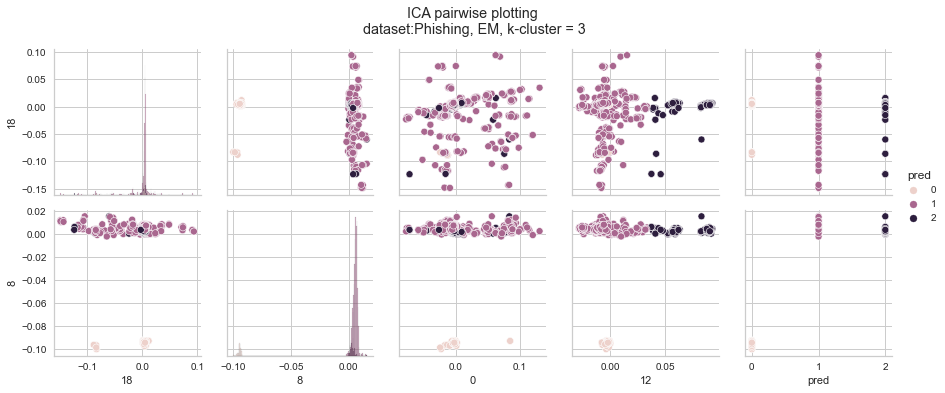

In [170]:
plot_em_pairwise(X_ica_proj, 3, 'tied','ICA pairwise plotting\n dataset:Phishing')

### RP

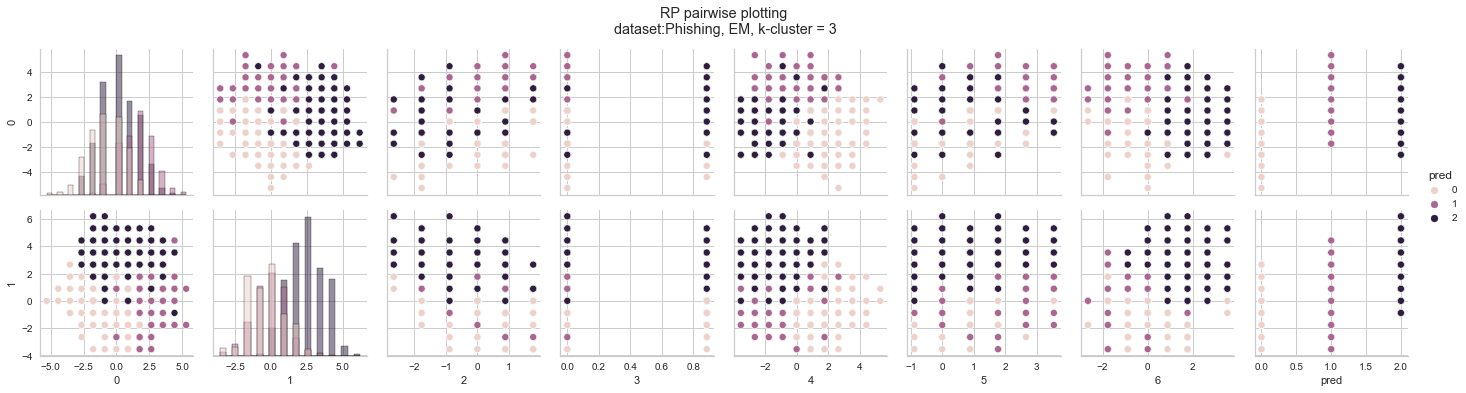

In [178]:
plot_em_pairwise(X_rp_proj[1], 3, 'tied','RP pairwise plotting\n dataset:Phishing')

### RFC

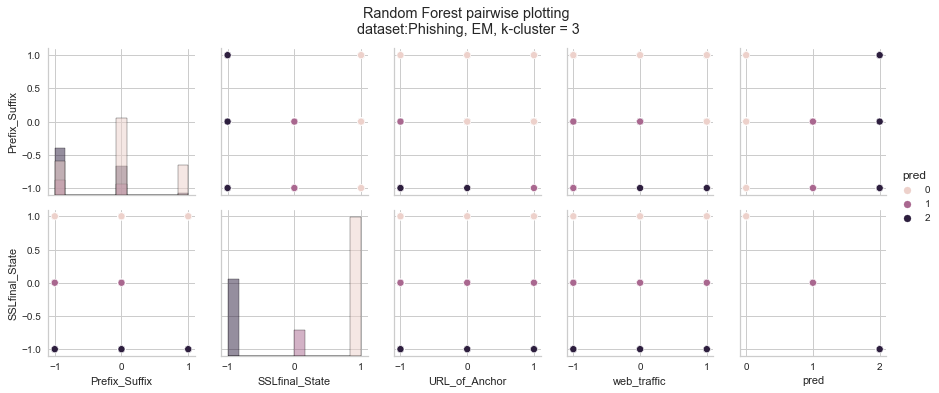

In [179]:
plot_em_pairwise(X_rfc_proj, 3, 'tied','Random Forest pairwise plotting\n dataset:Phishing')